In [9]:
import sys, json, string
import os.path as op
from nilearn import image, plotting, datasets
from glob import glob
import pandas as pd
sys.path.append('/home/grg/git/alfa')
from roistats import collect, plotting
%matplotlib inline
import matplotlib as mpl
facecolor = '#fcdecf'
mpl.rcParams['figure.facecolor'] = facecolor

# Plotting DWI in relation to centiloids without homozygotes

### Mean diffusivity

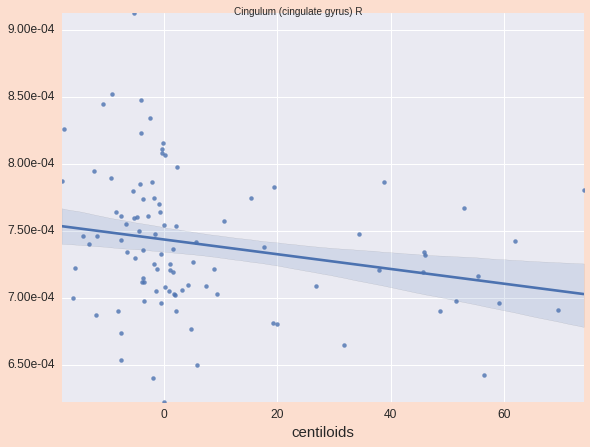

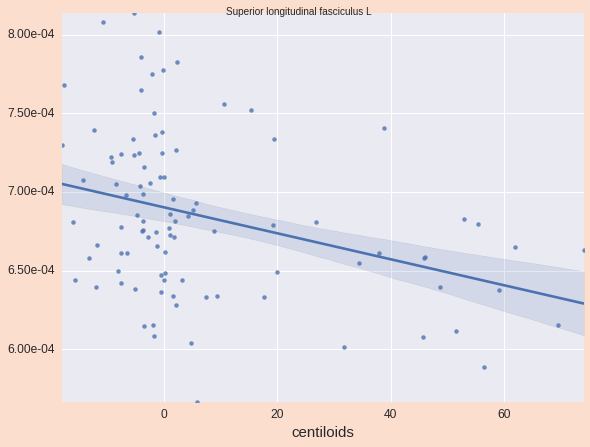

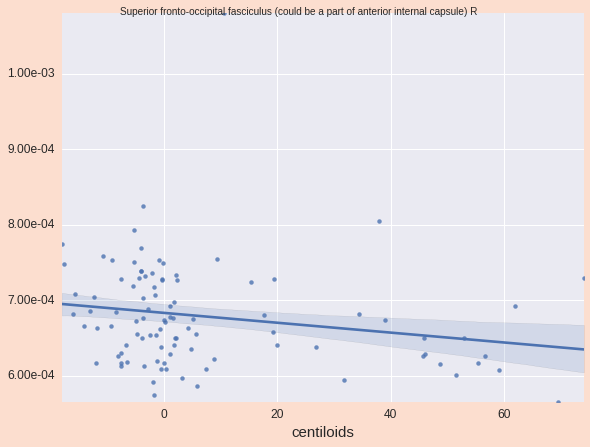

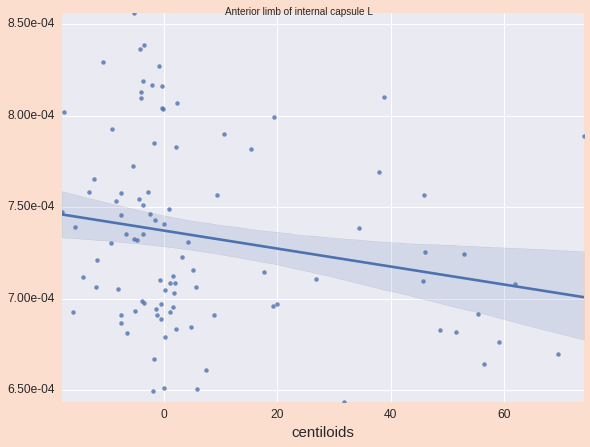

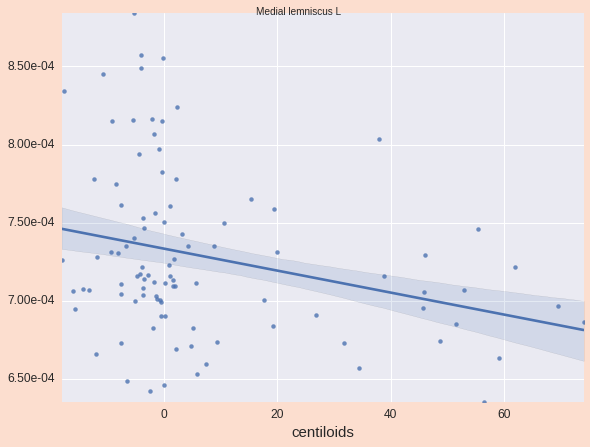

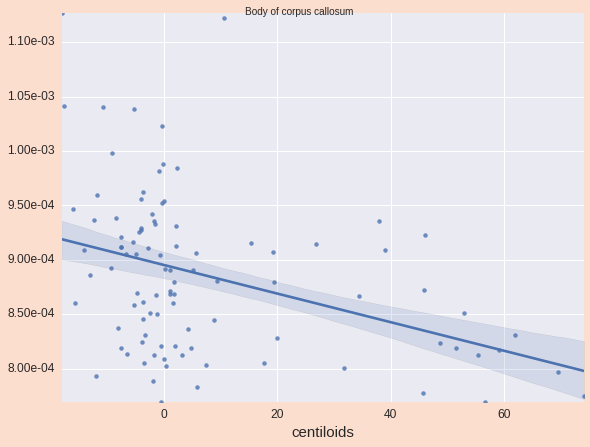

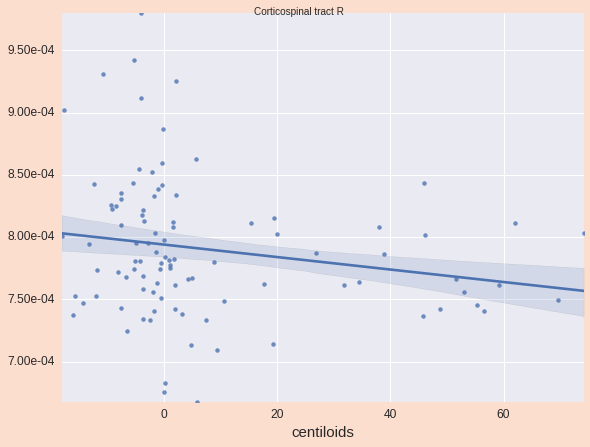

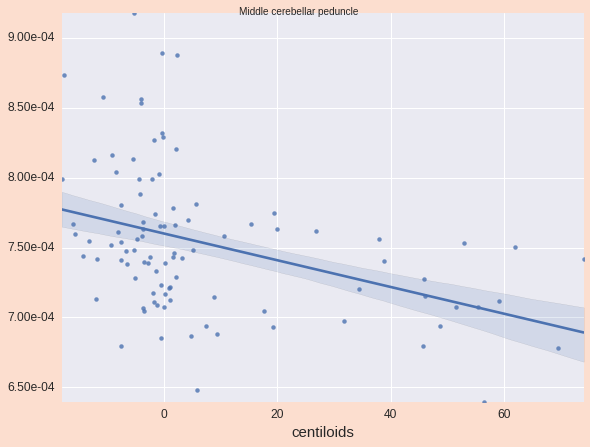

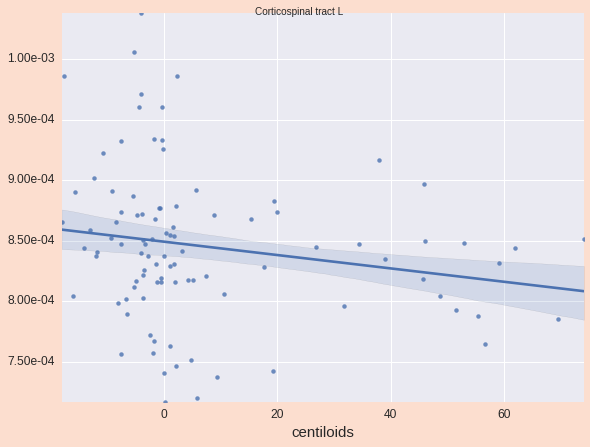

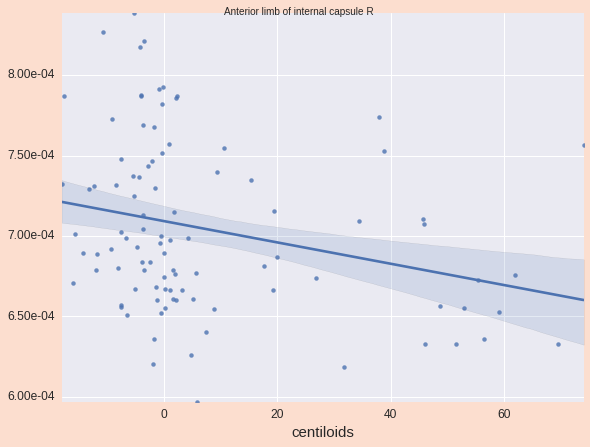

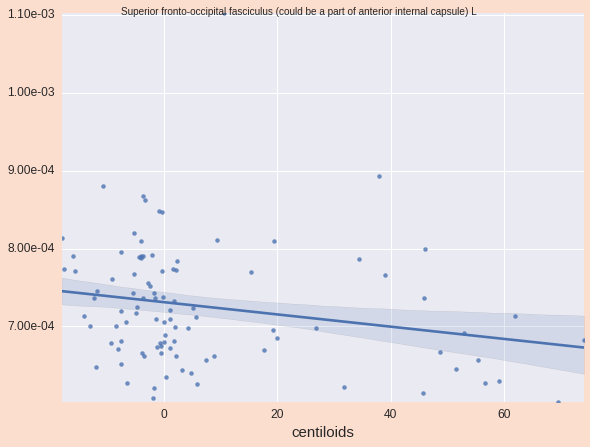

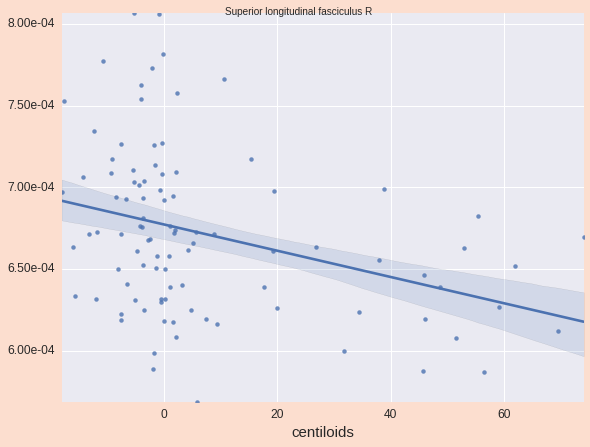

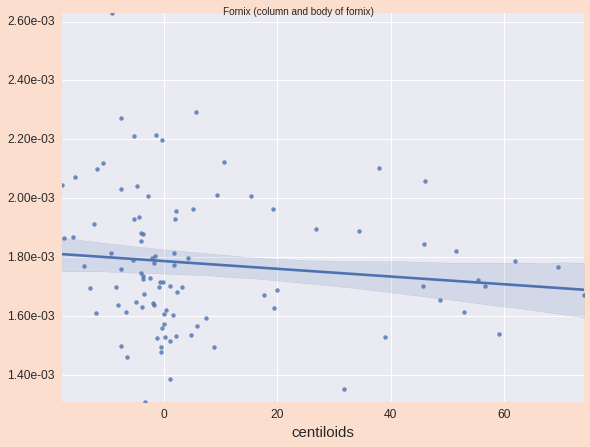

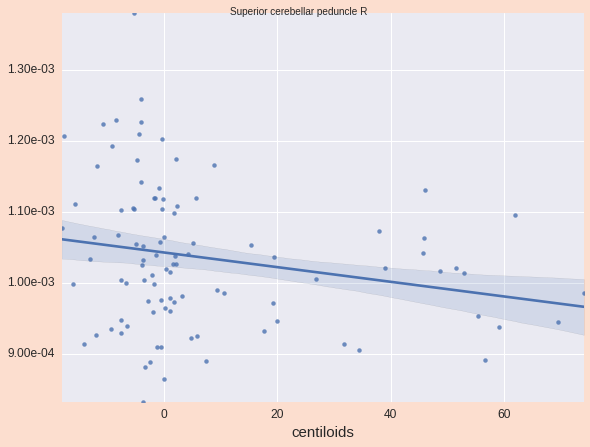

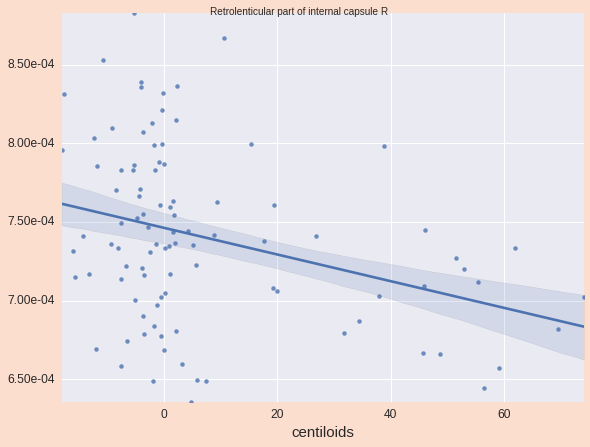

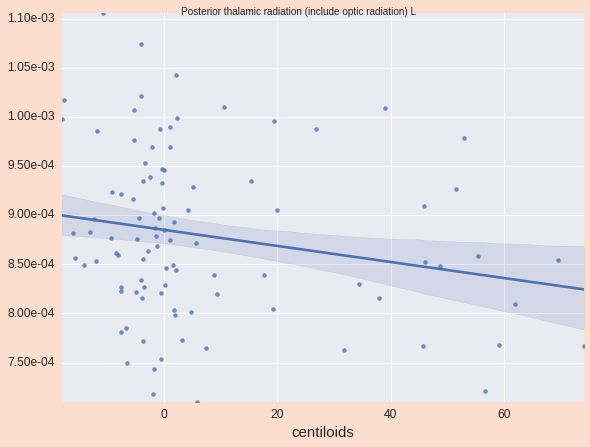

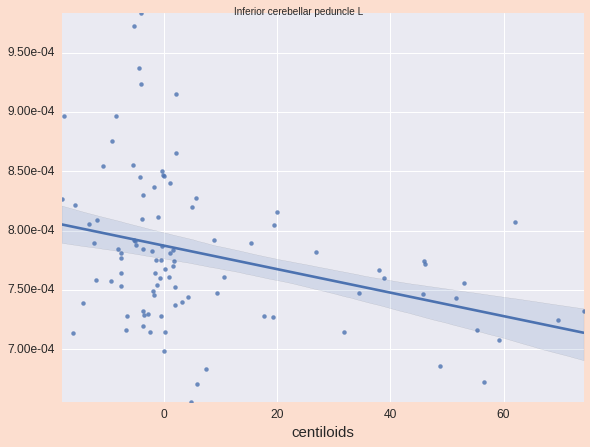

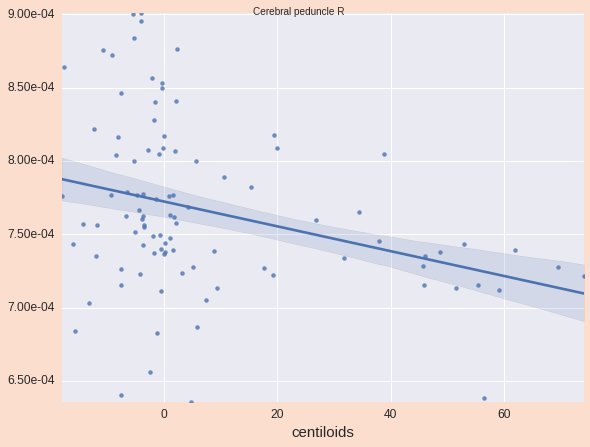

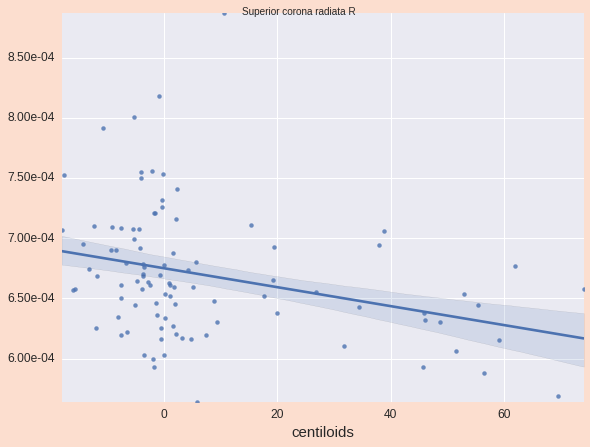

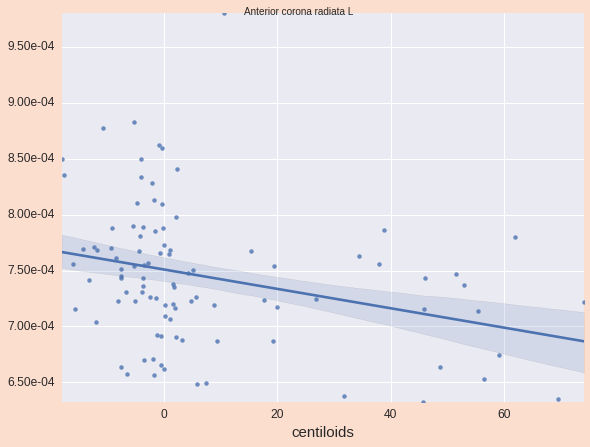

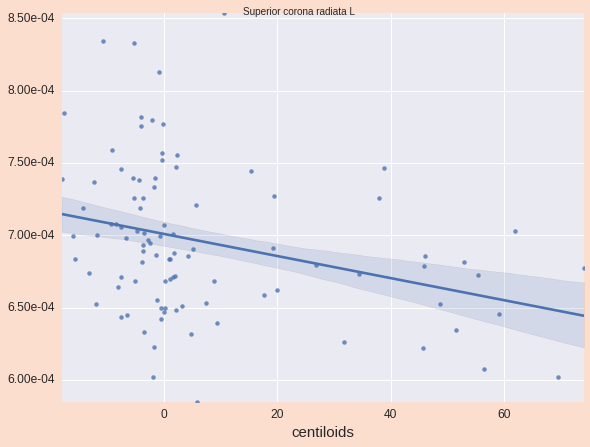

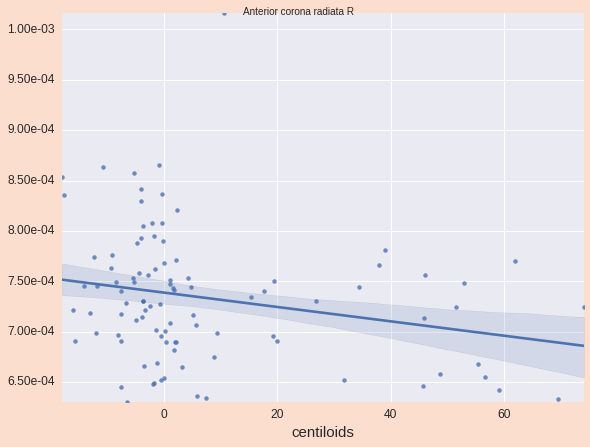

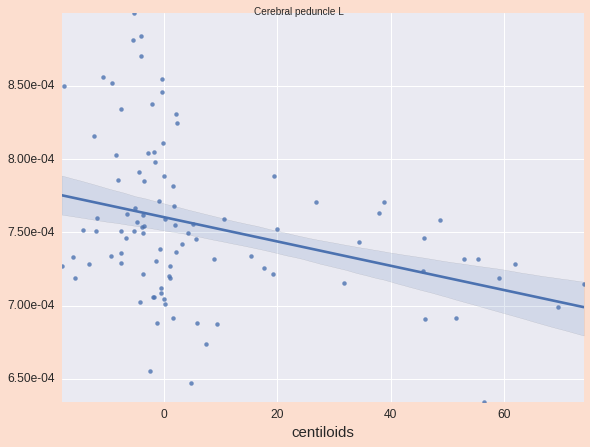

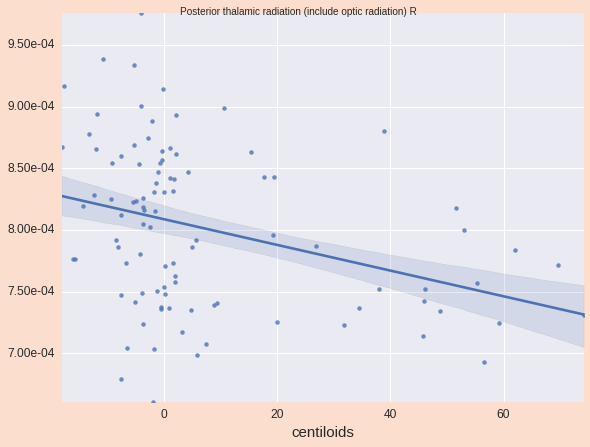

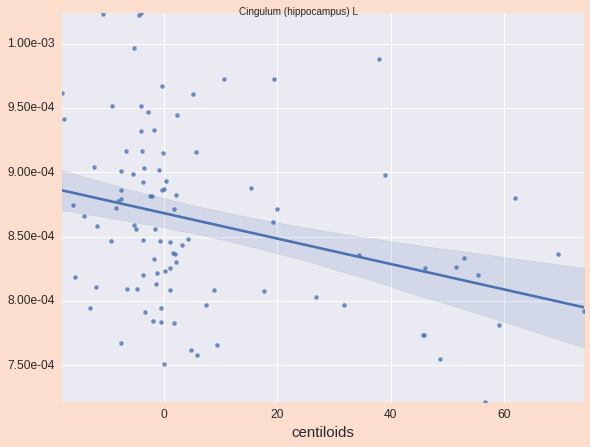

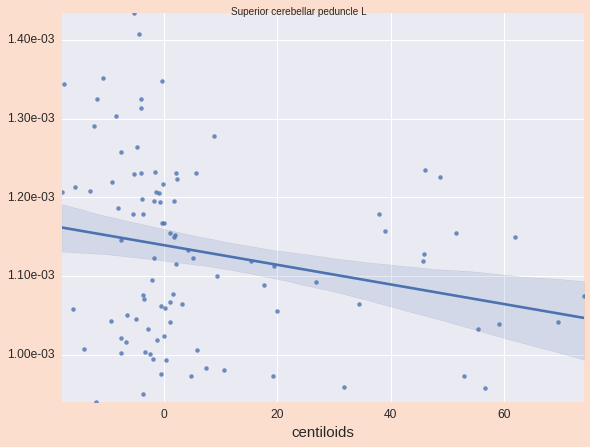

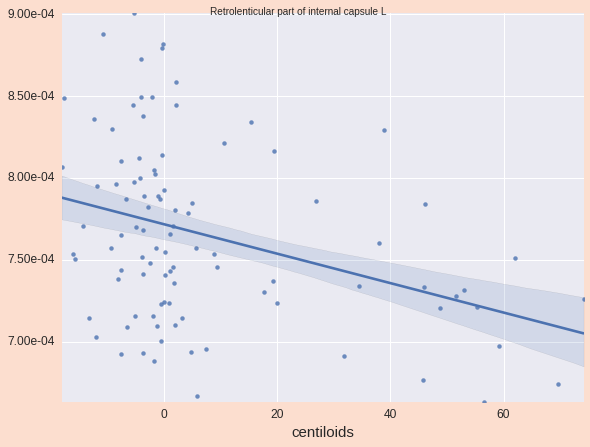

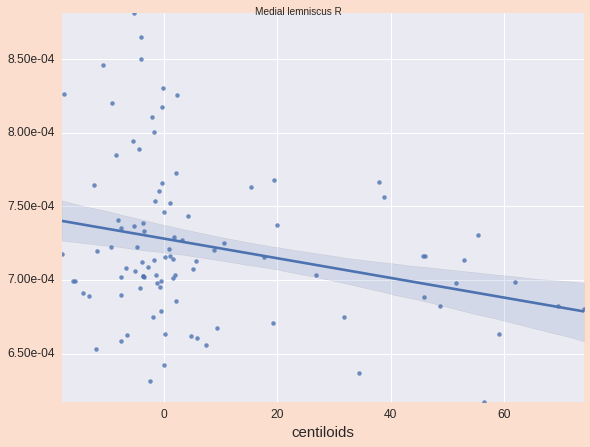

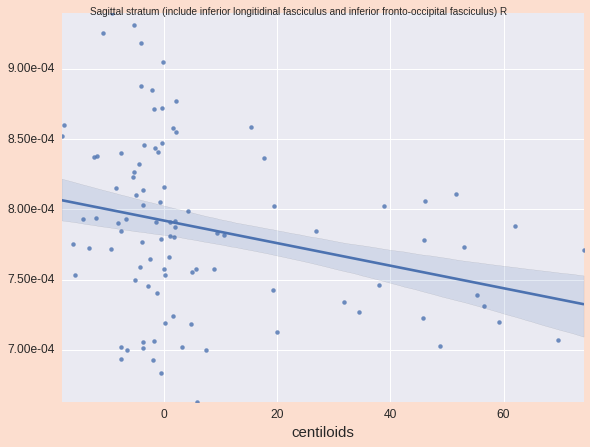

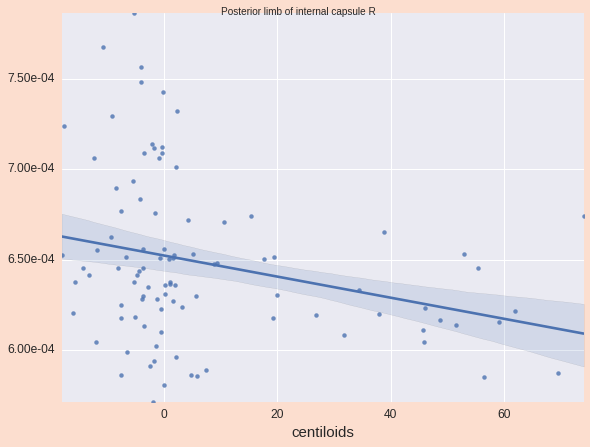

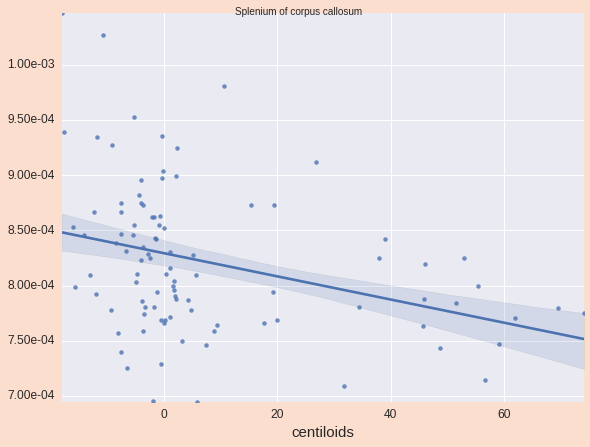

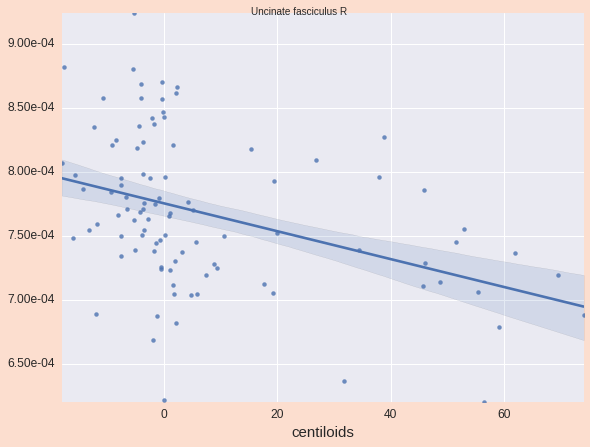

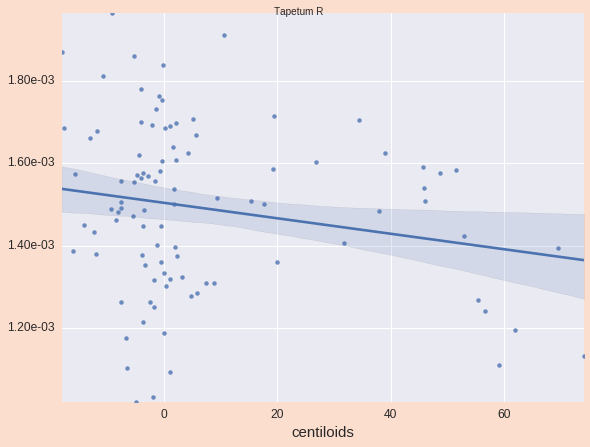

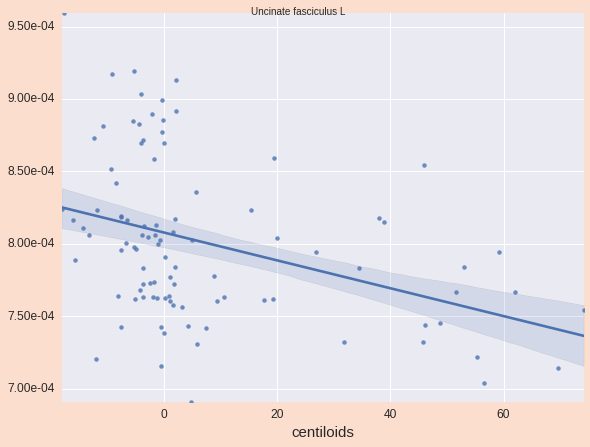

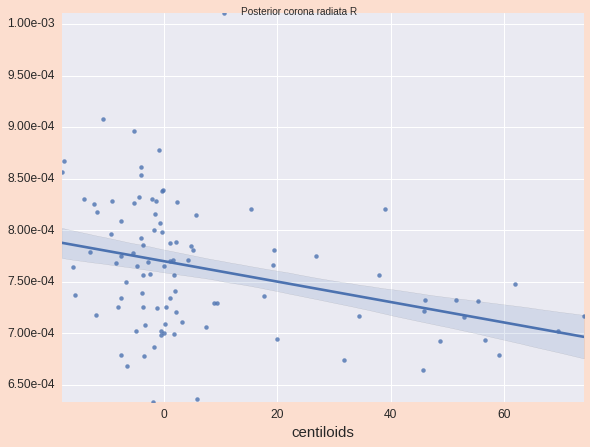

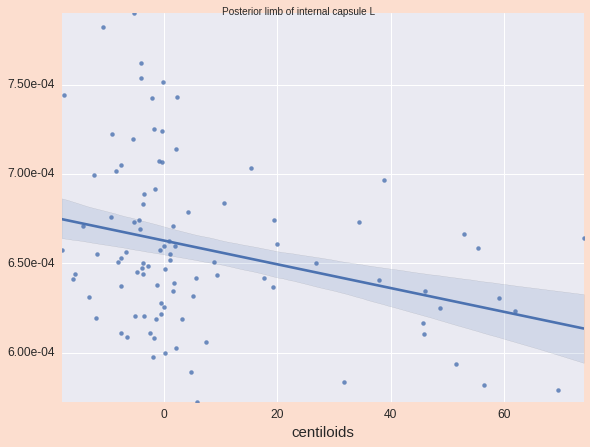

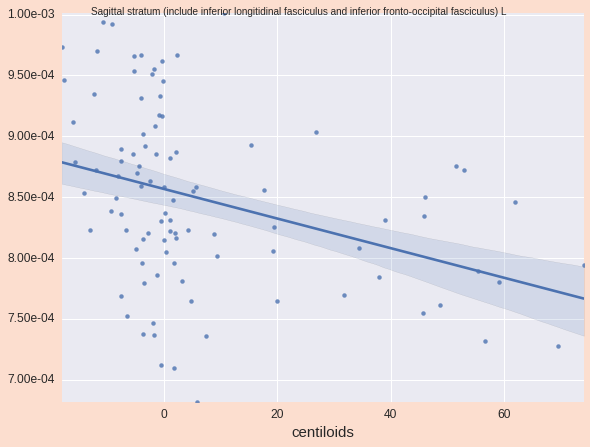

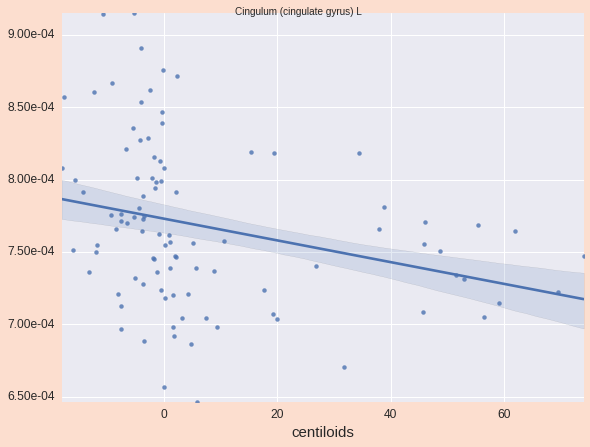

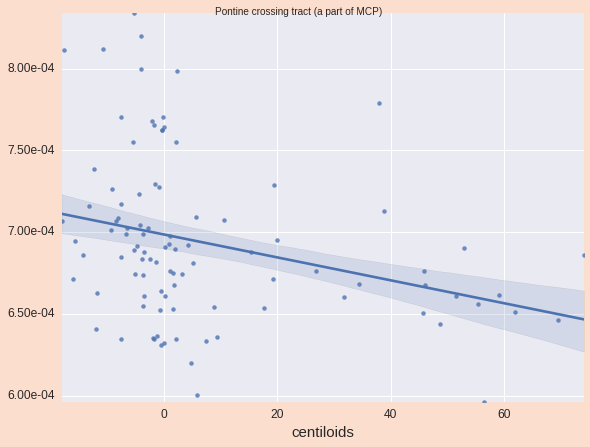

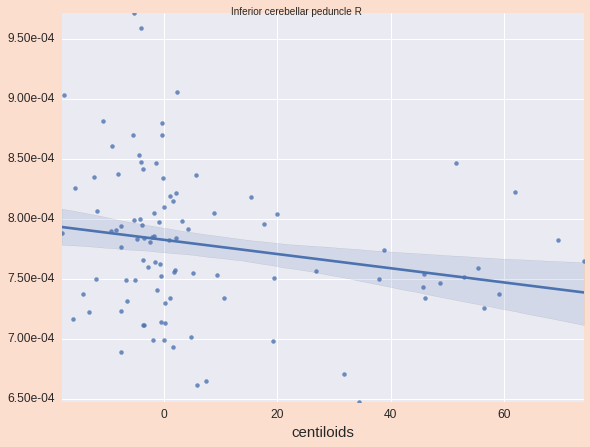

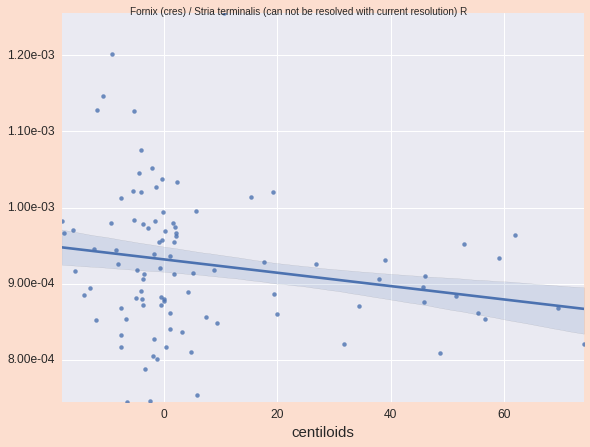

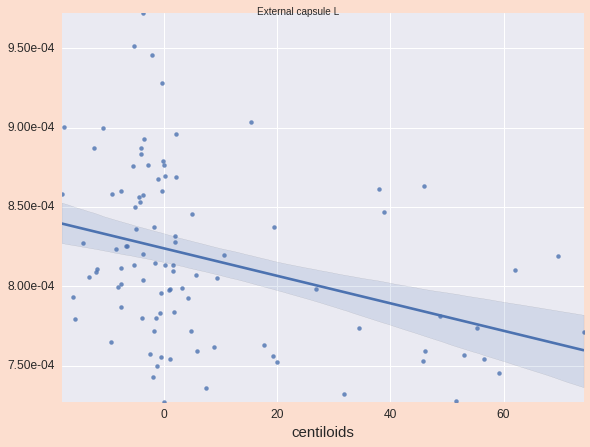

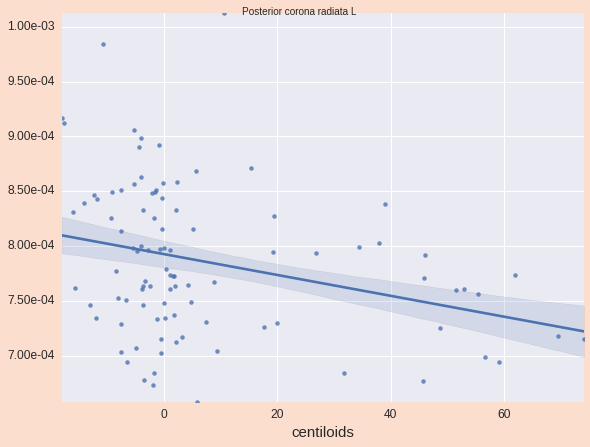

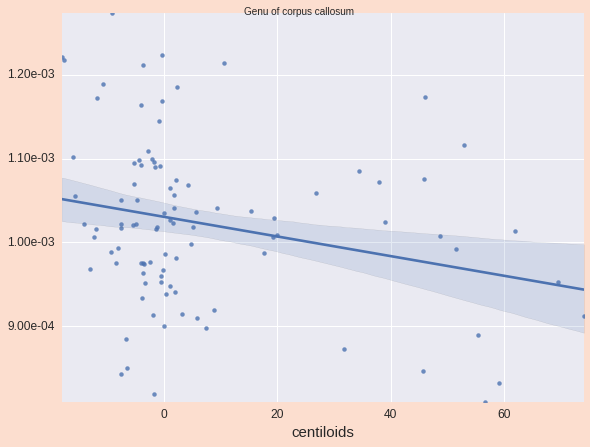

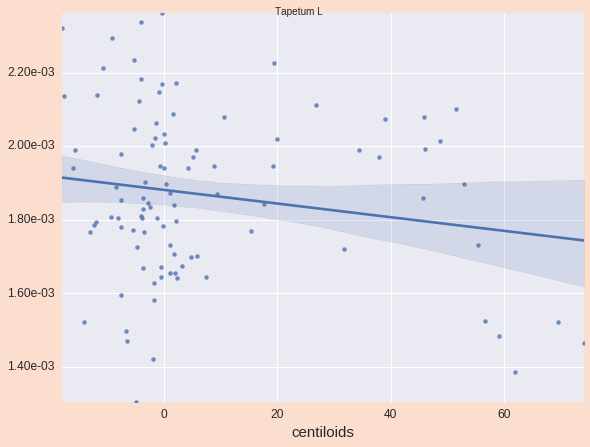

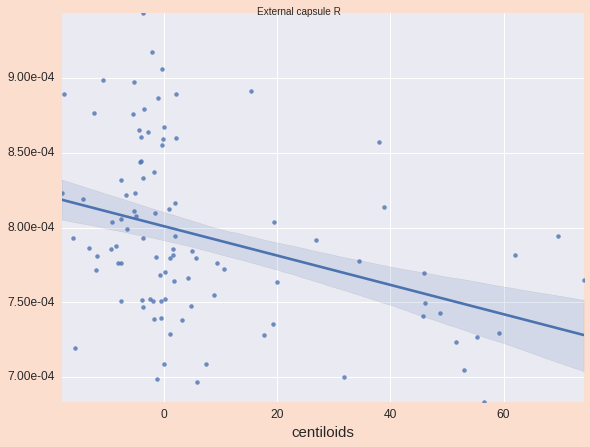

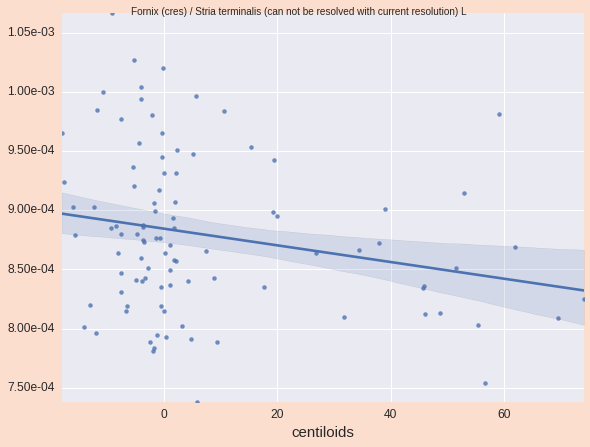

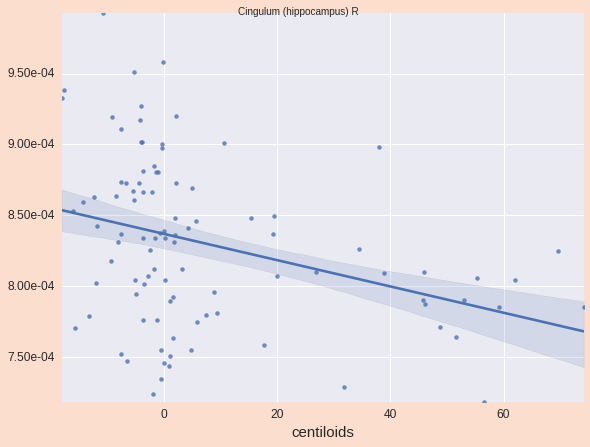

In [10]:
reload(plotting)
data = pd.read_excel('/home/grg/amylstaging_ICBM-labels-1mm_TBSS_roivalues_MD.xls').set_index('subject')

cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)
data = data[data['apoe'] != 2]


for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data, hue=None, savefig='/home/grg/jpg/md%03d.jpg'%i, facecolor=facecolor)

### Fractional anisotropy

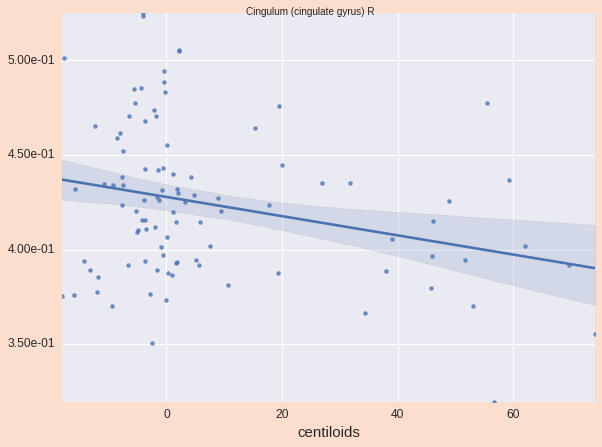

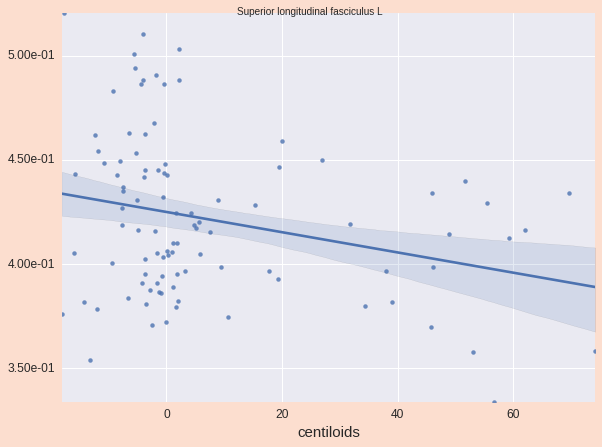

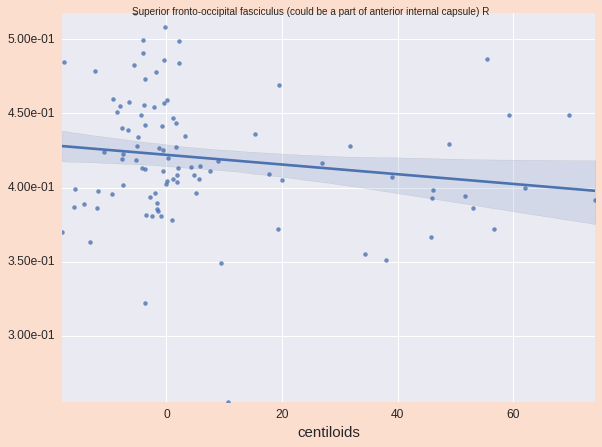

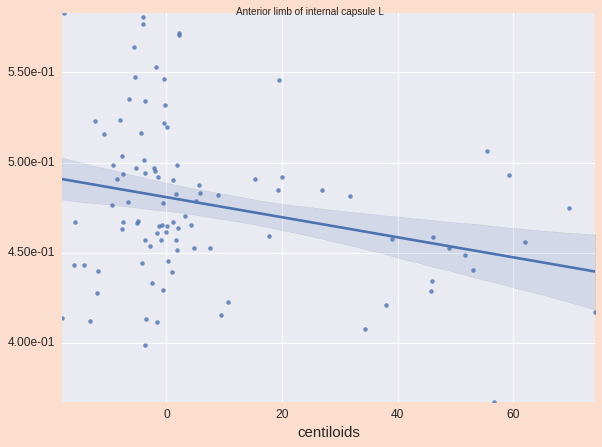

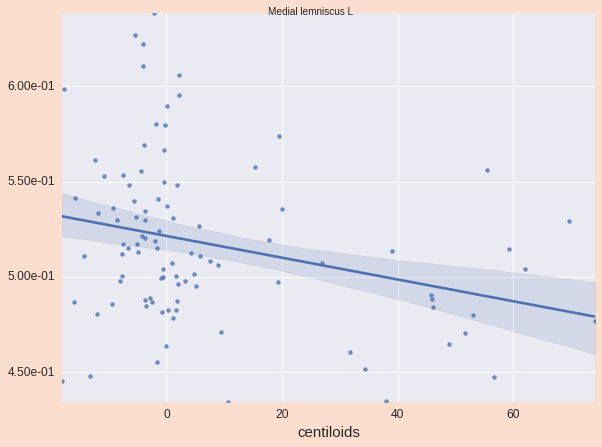

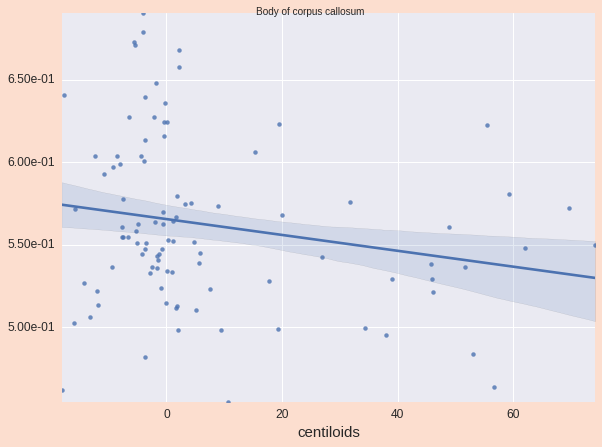

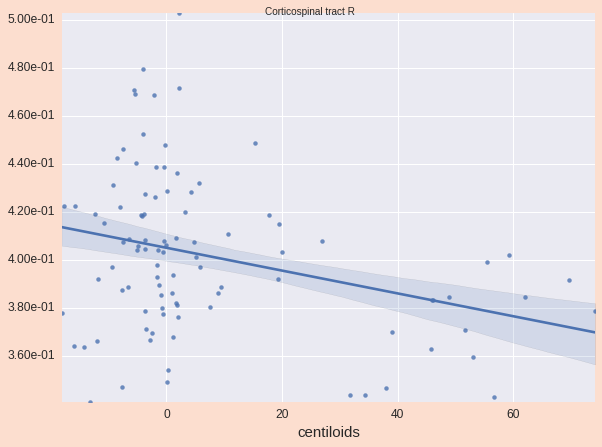

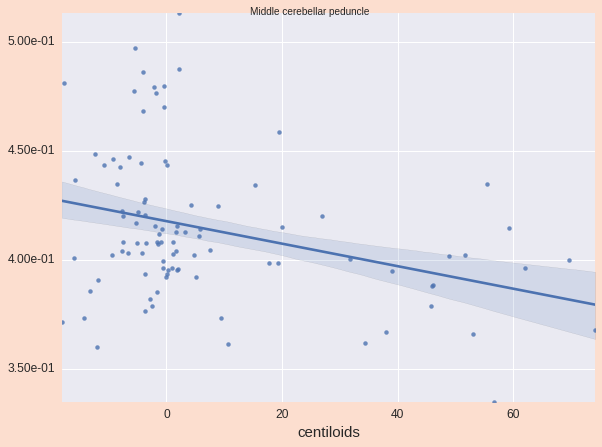

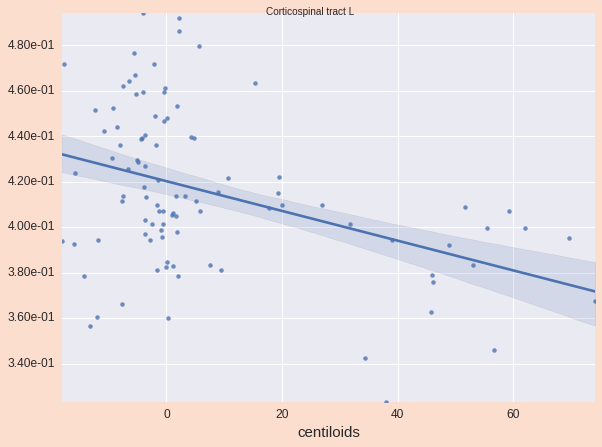

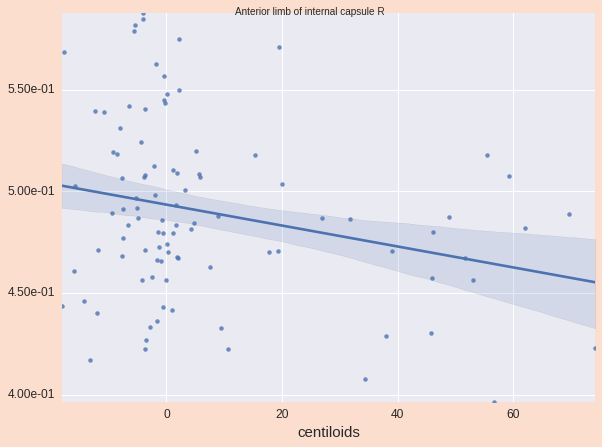

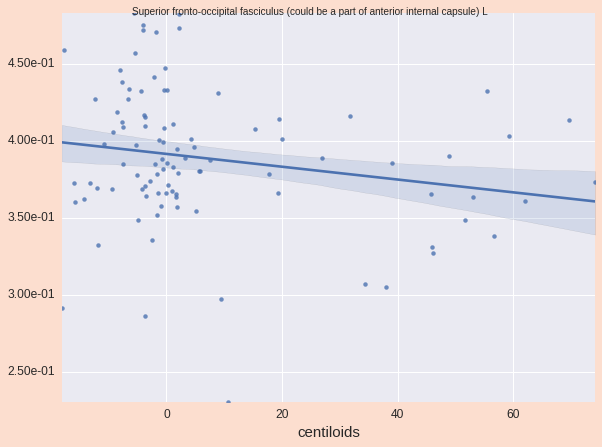

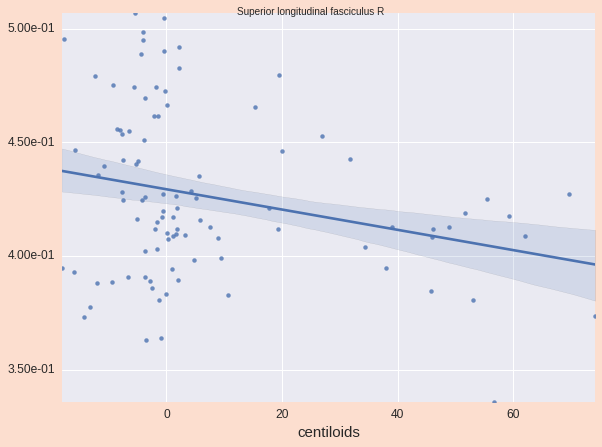

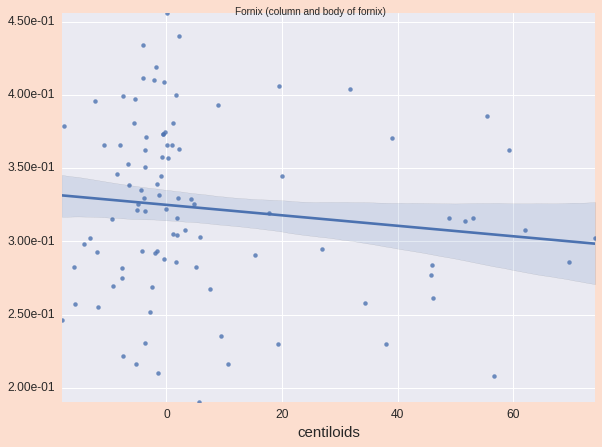

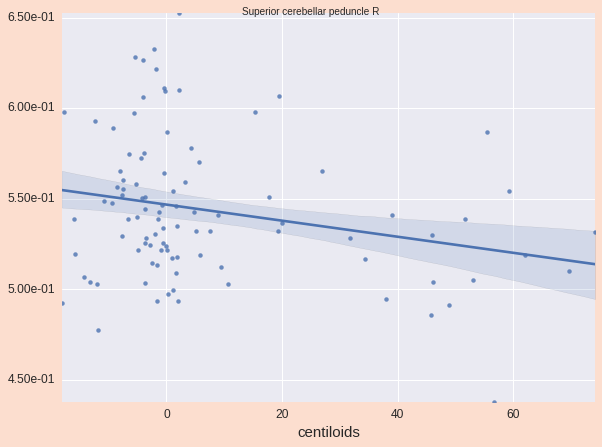

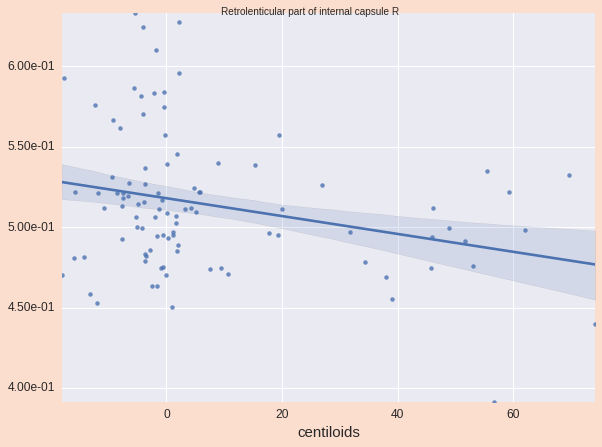

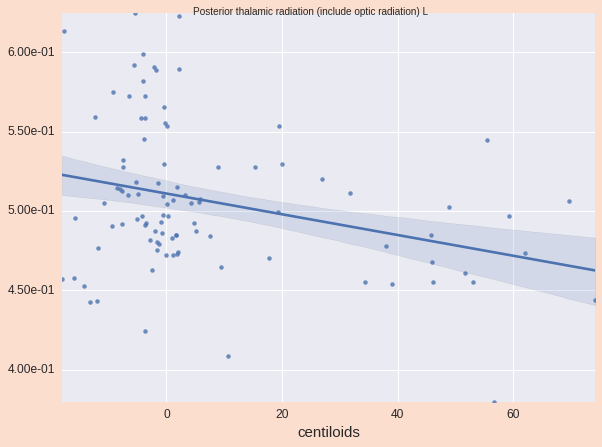

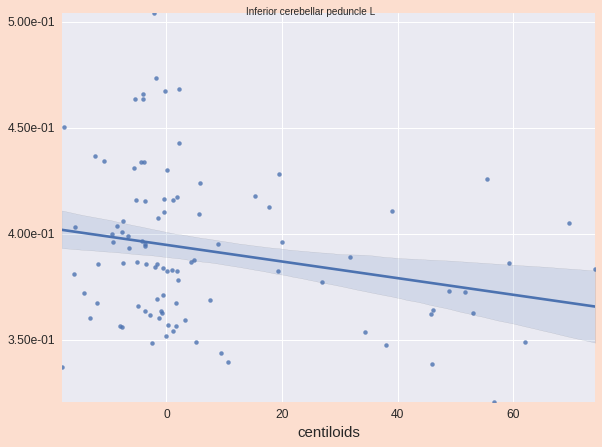

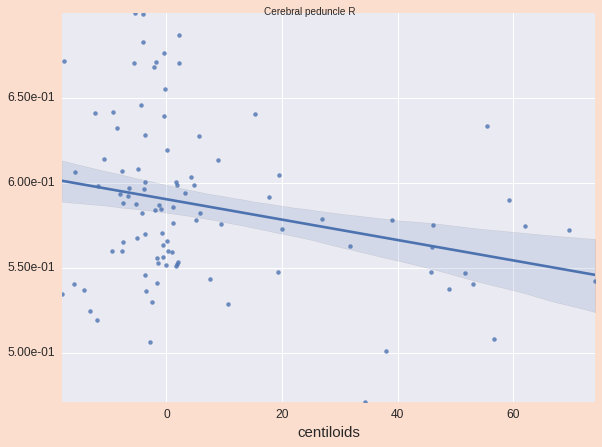

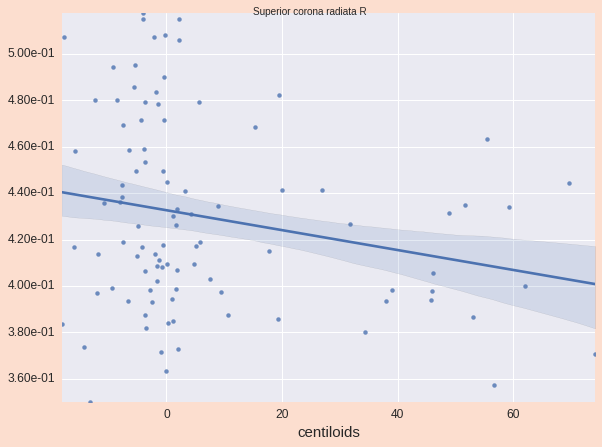

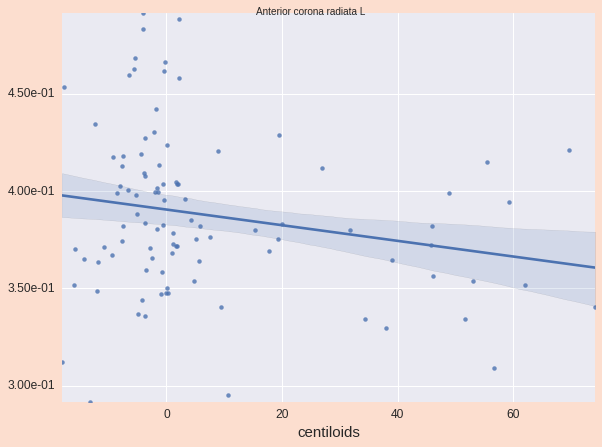

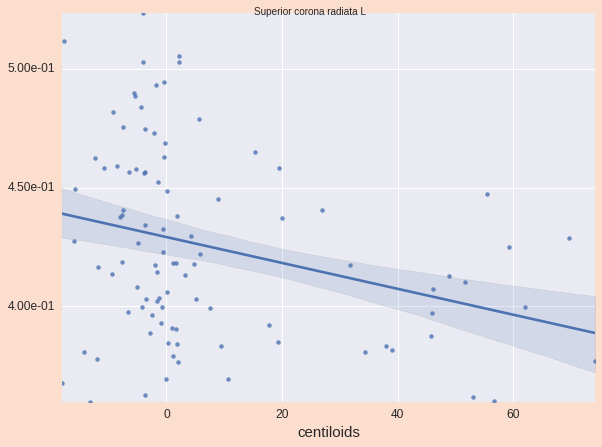

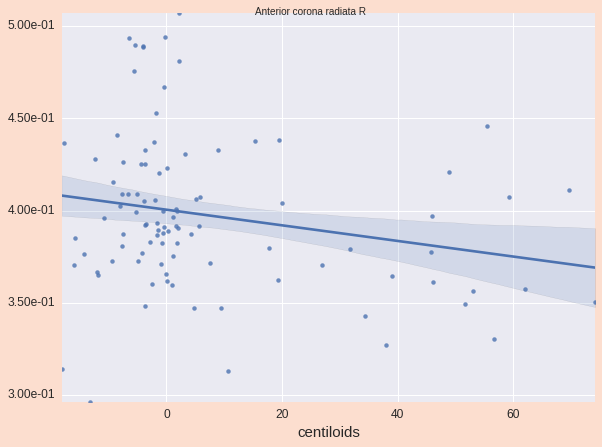

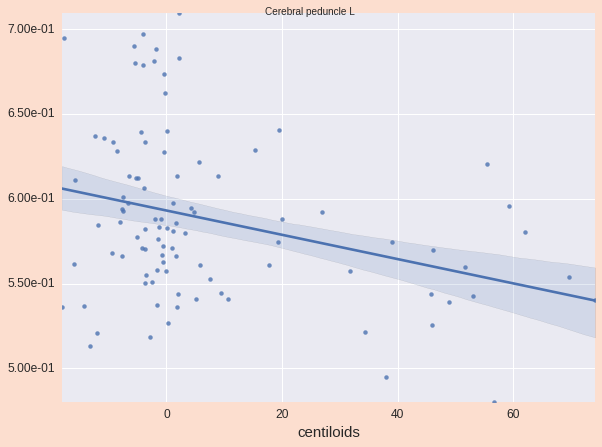

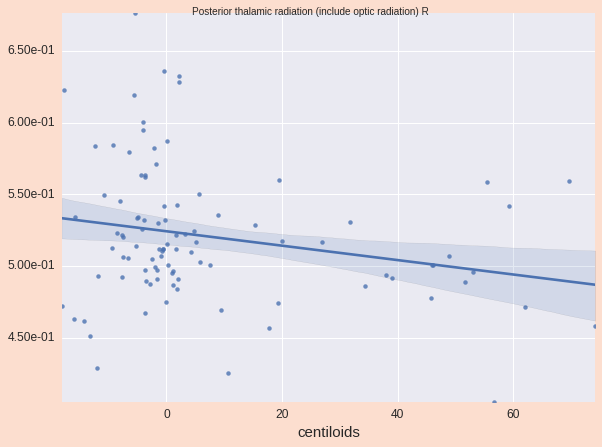

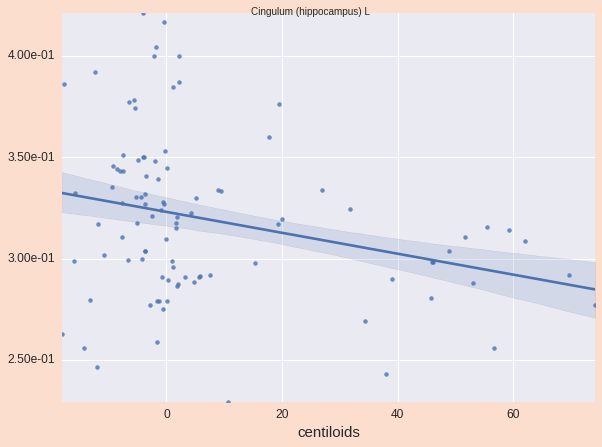

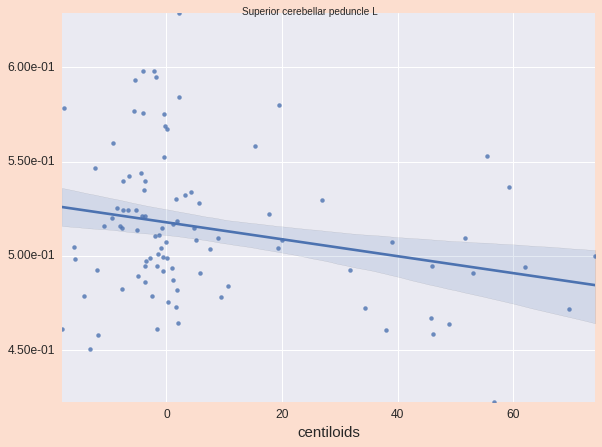

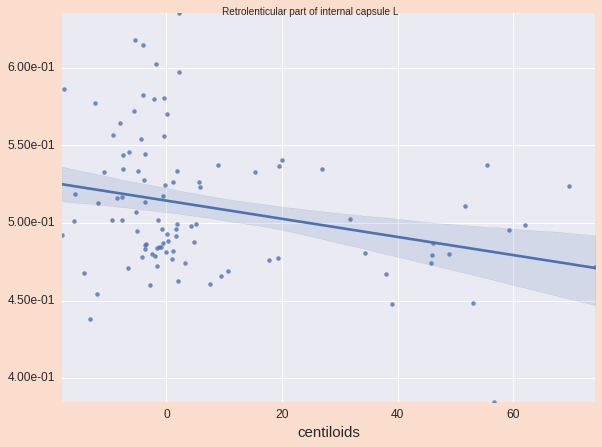

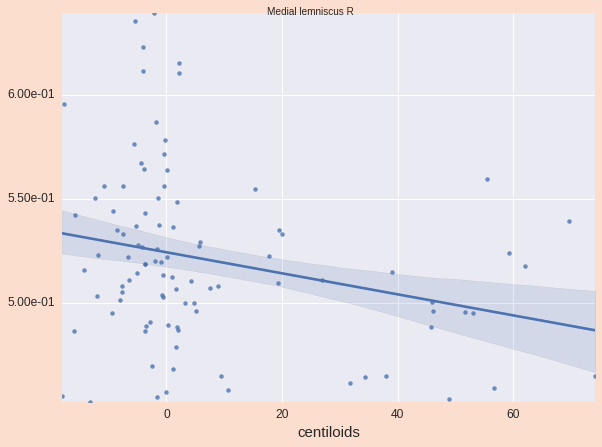

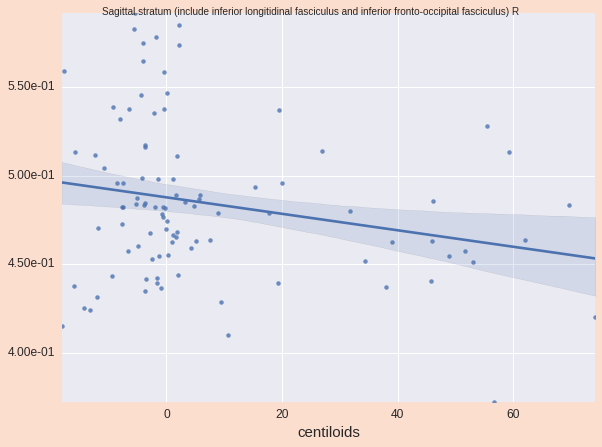

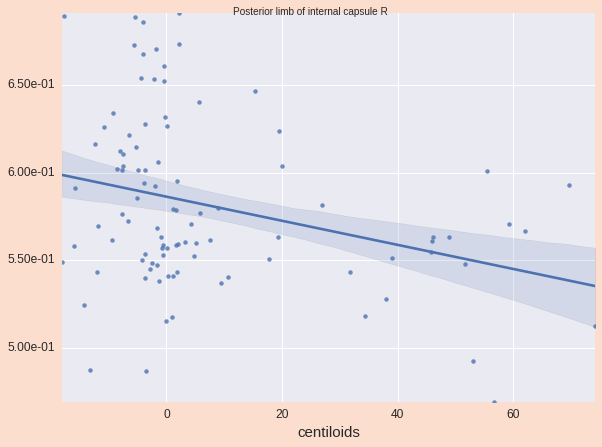

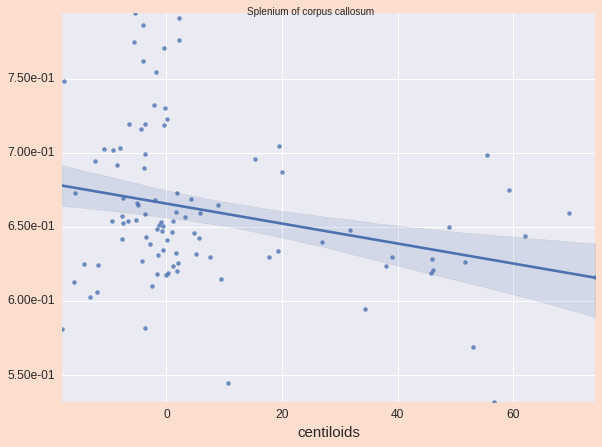

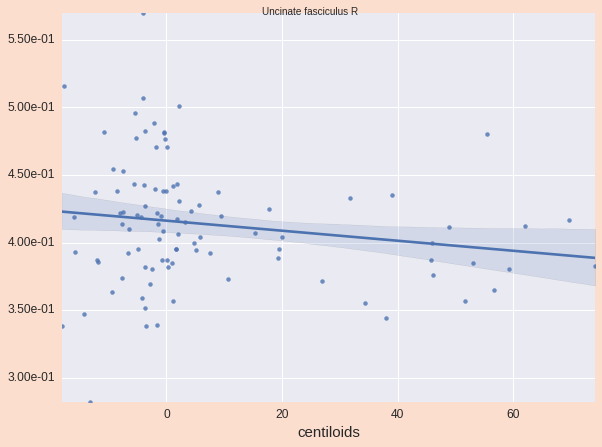

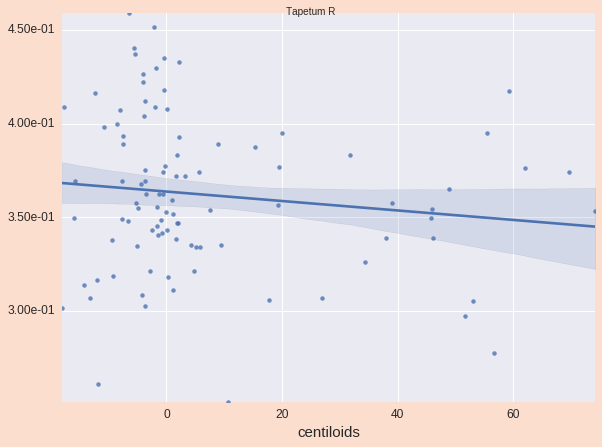

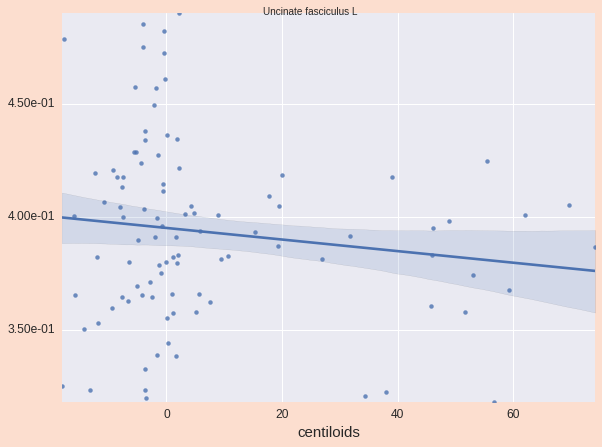

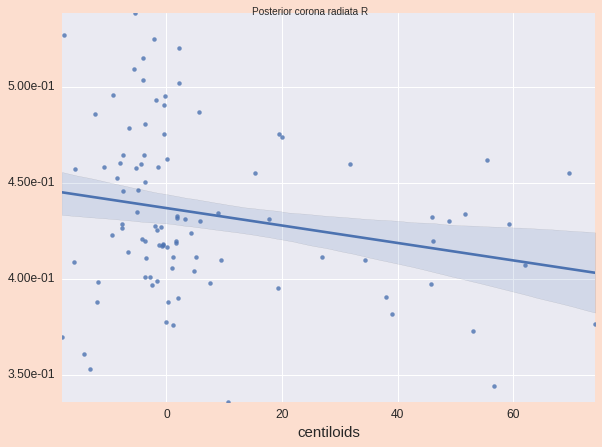

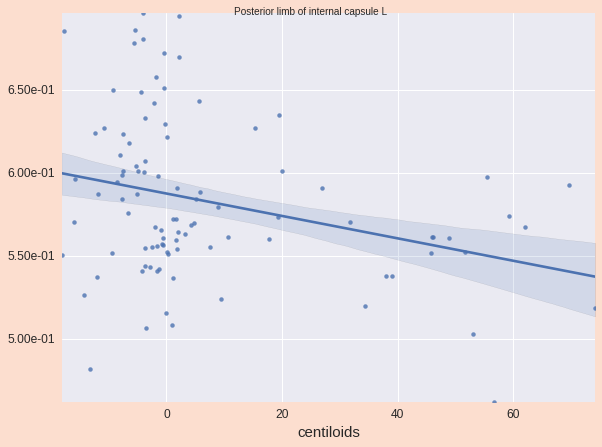

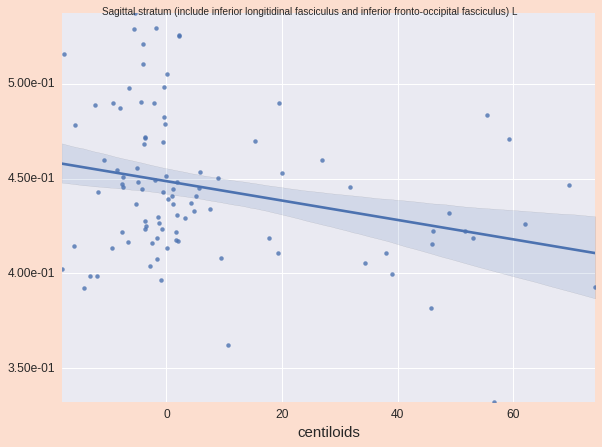

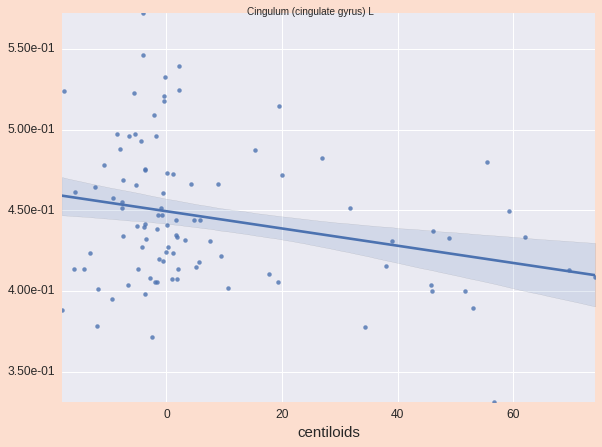

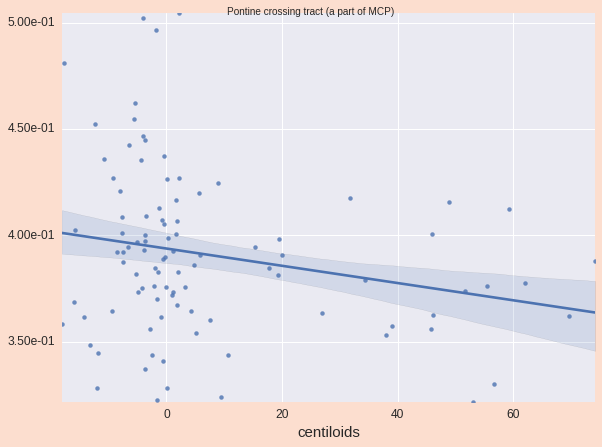

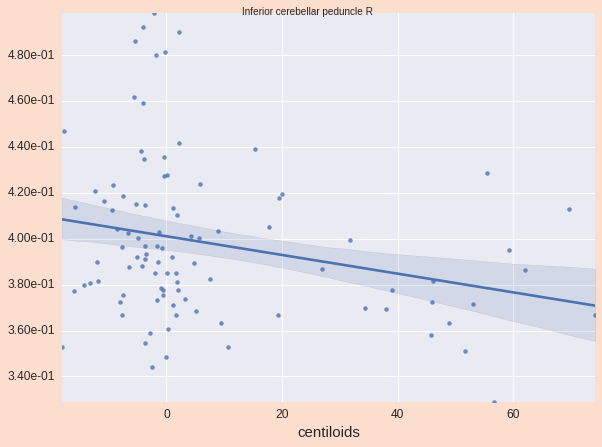

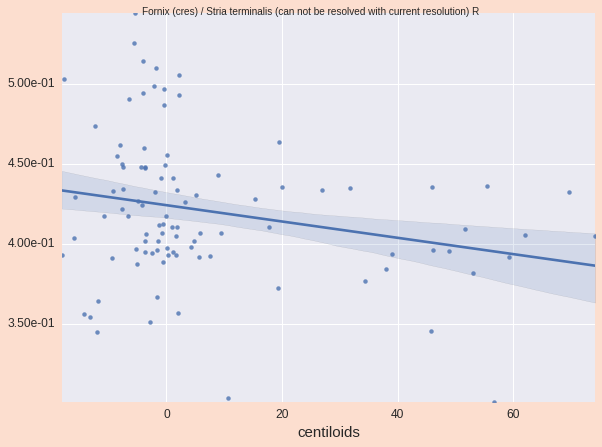

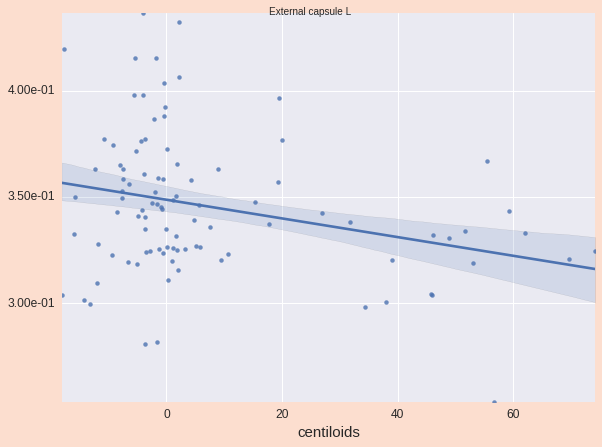

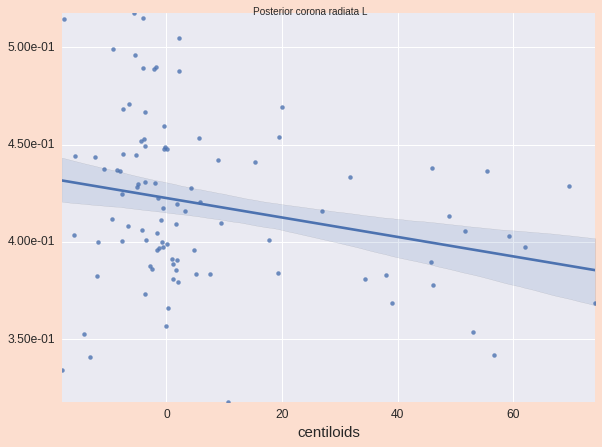

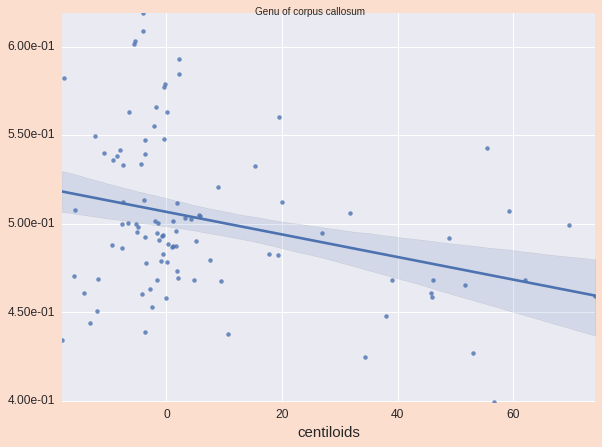

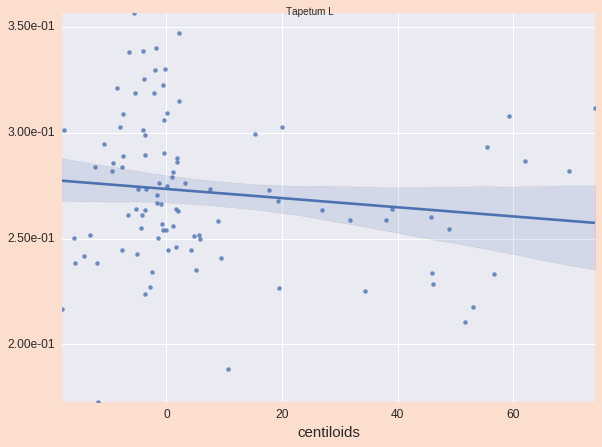

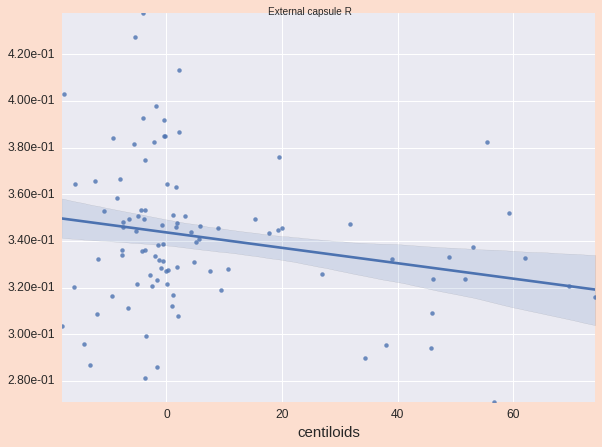

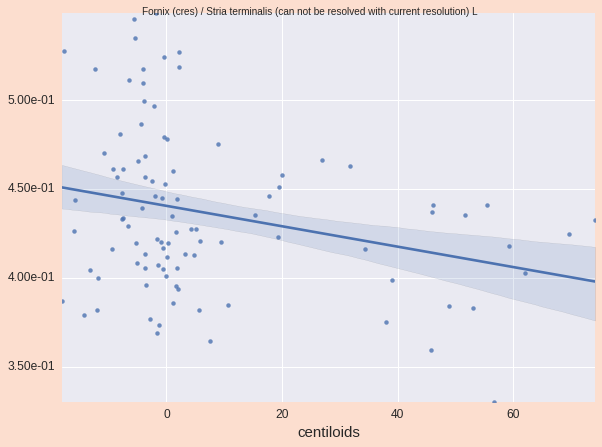

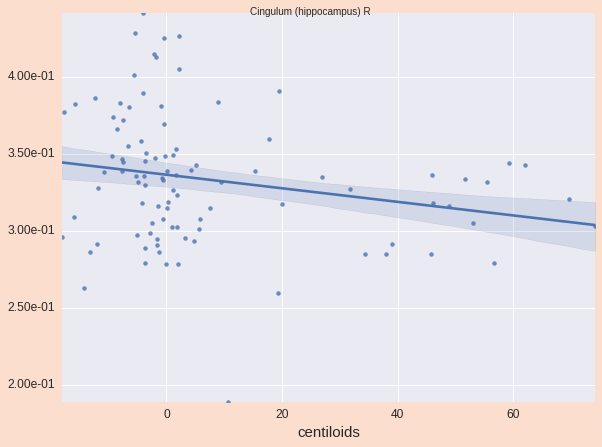

In [11]:
data = pd.read_excel('/tmp/amylstaging_ICBM-labels-1mm_TBSS_roivalues_FA.xls').set_index('subject')
cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)
data = data[data['apoe'] != 2]


for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data, hue=None, savefig='/home/grg/jpg/fa%03d.jpg'%i, facecolor=facecolor)

### Axial diffusivity

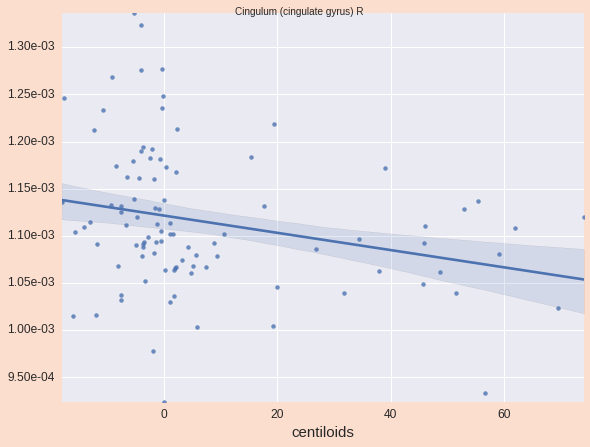

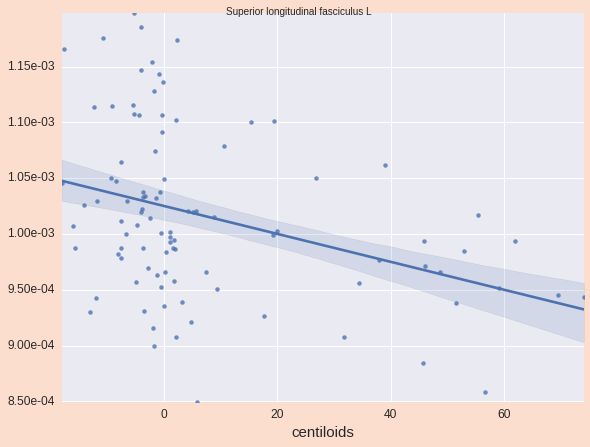

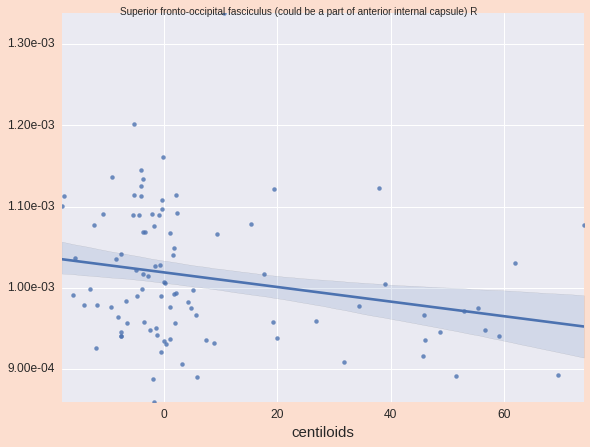

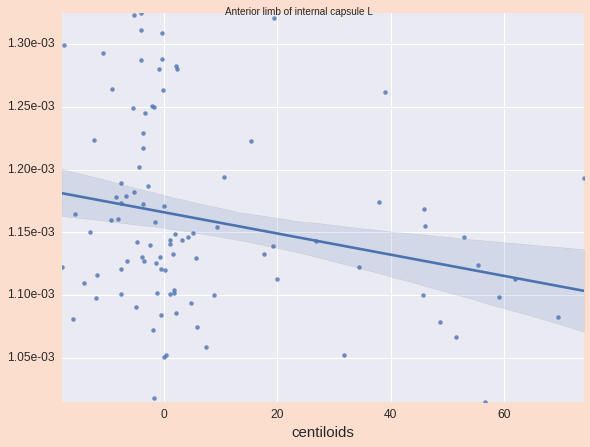

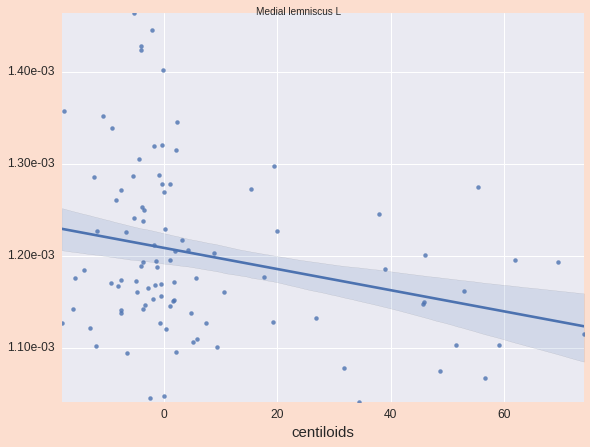

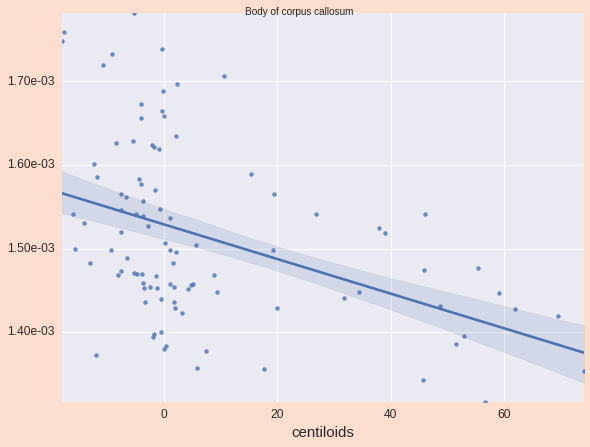

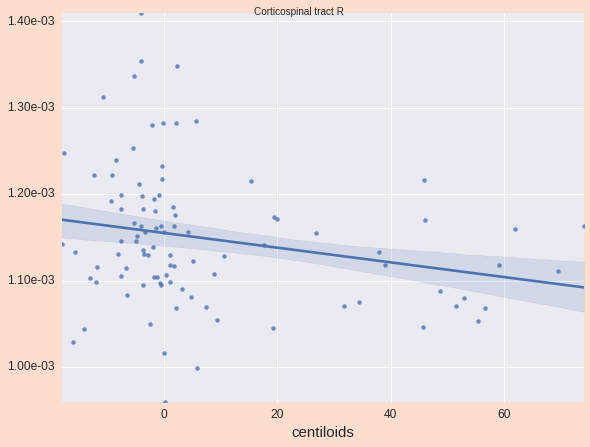

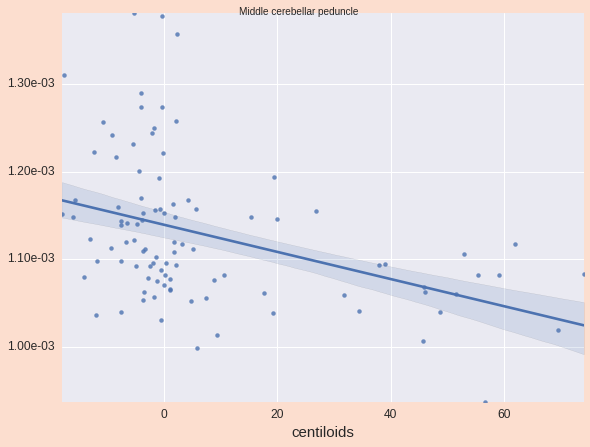

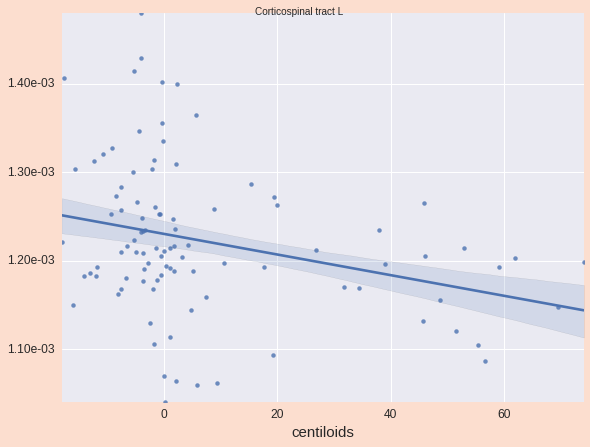

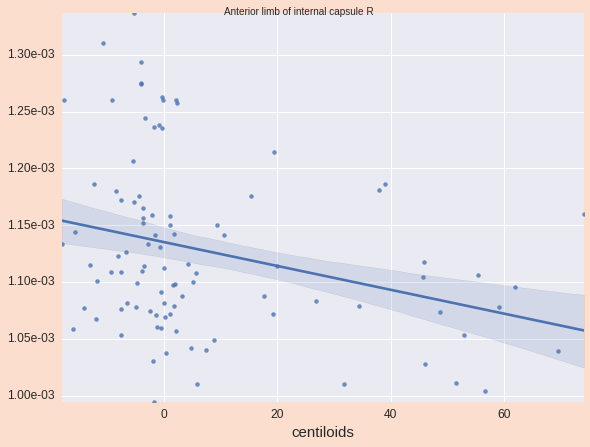

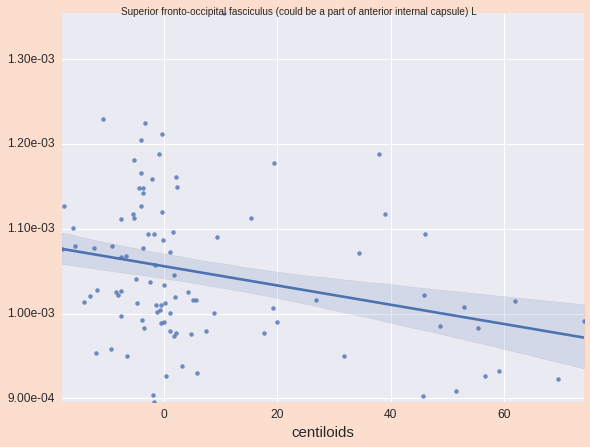

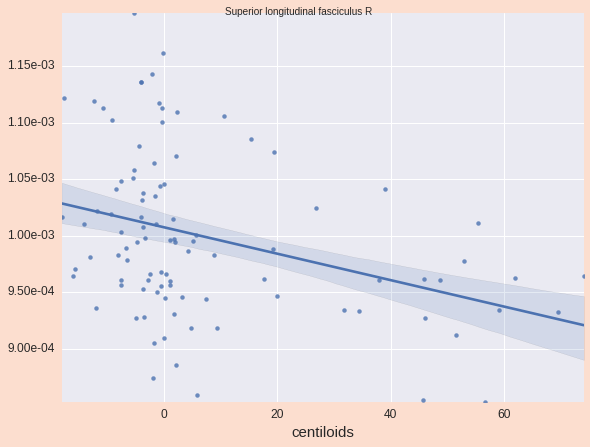

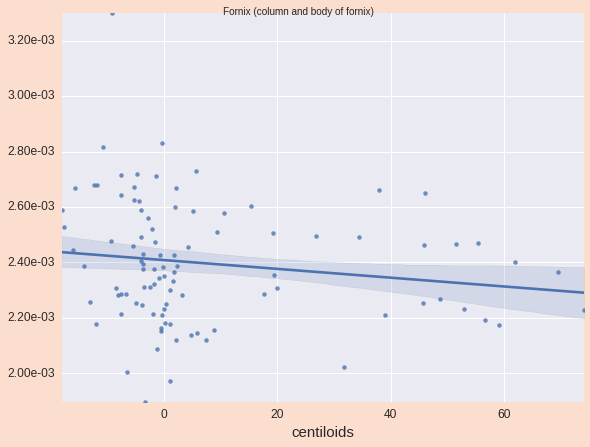

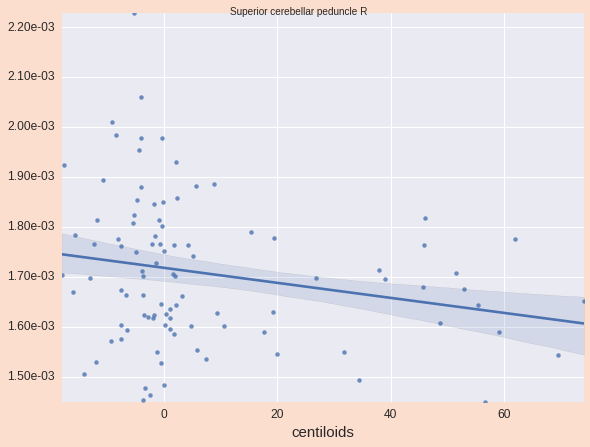

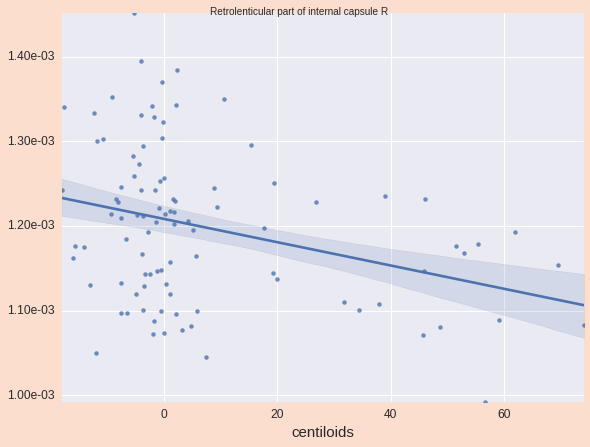

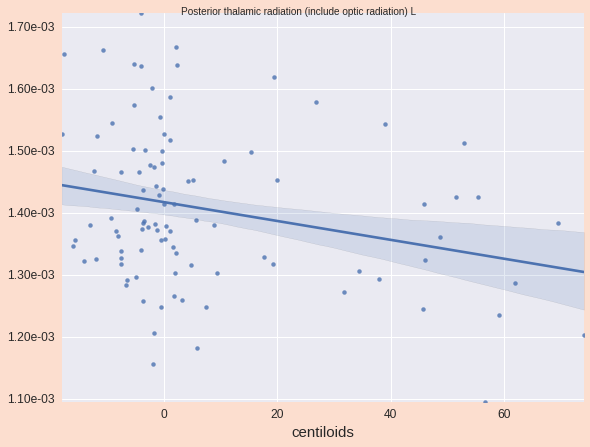

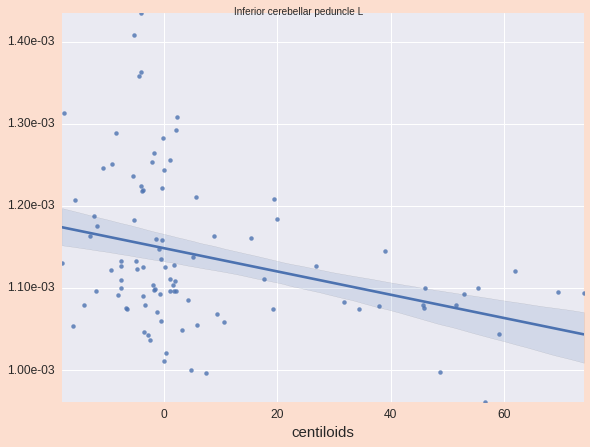

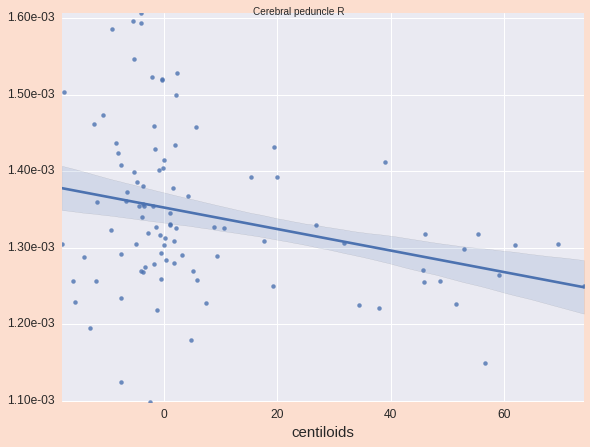

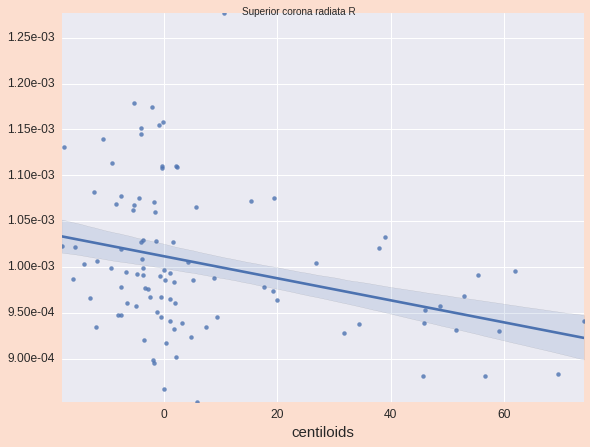

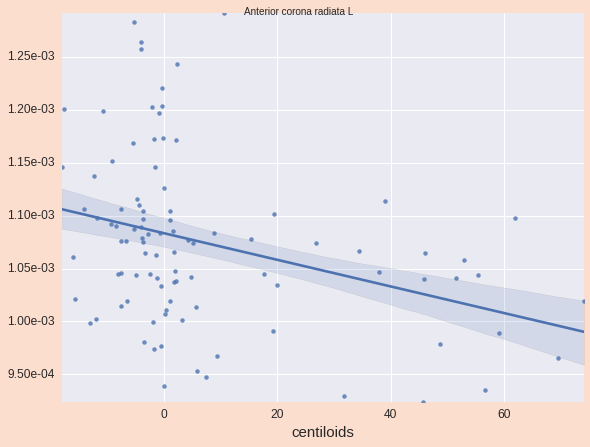

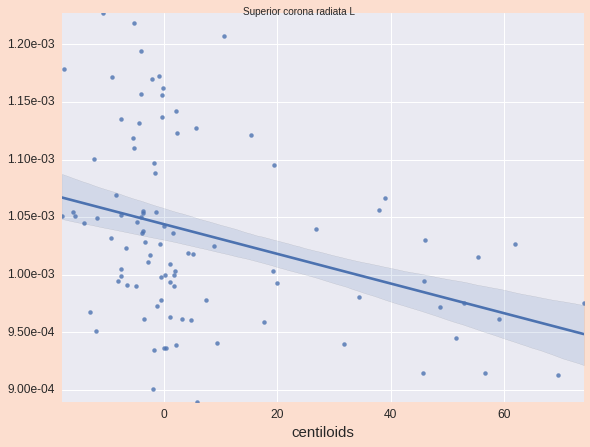

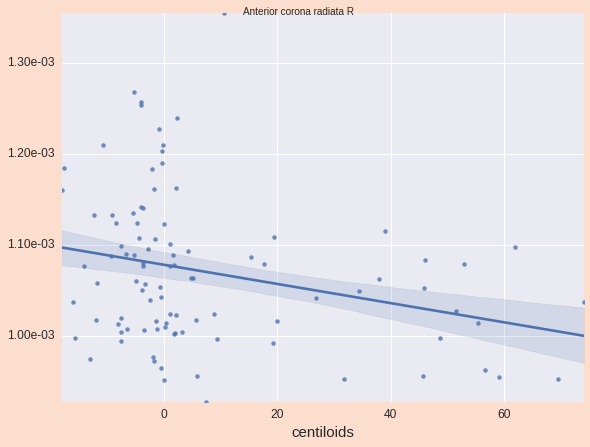

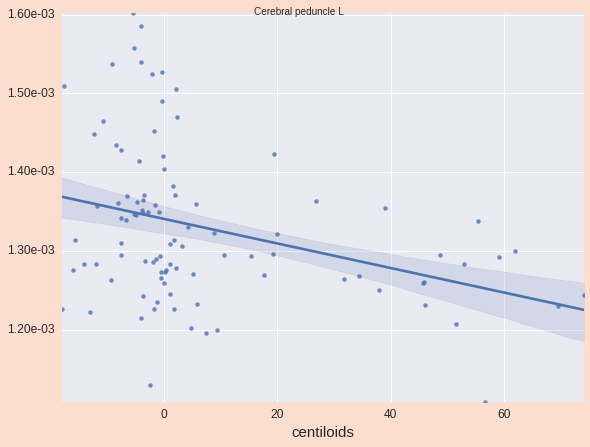

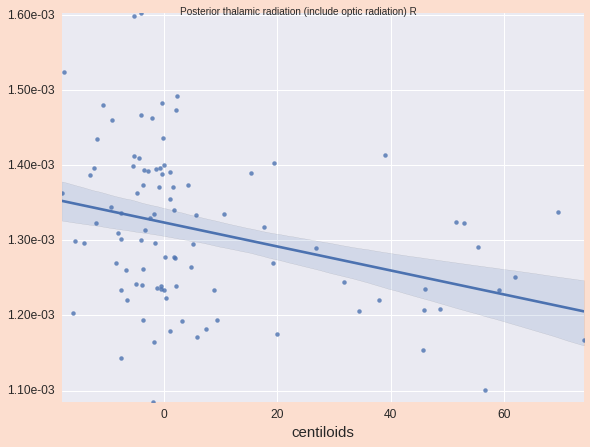

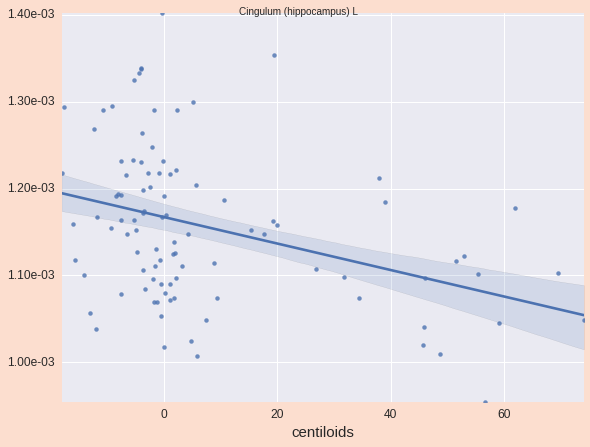

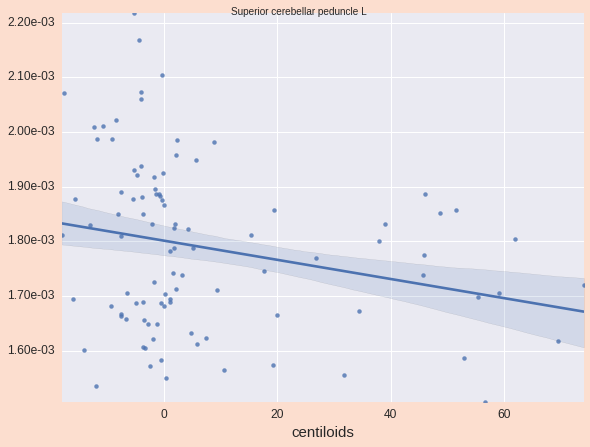

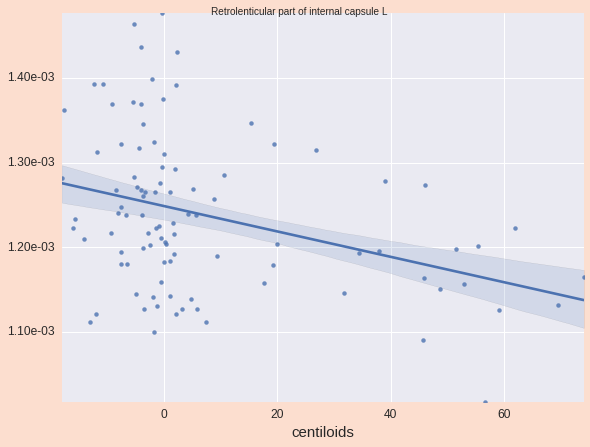

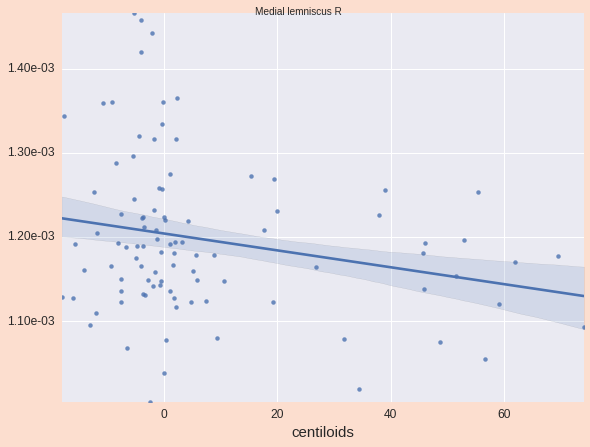

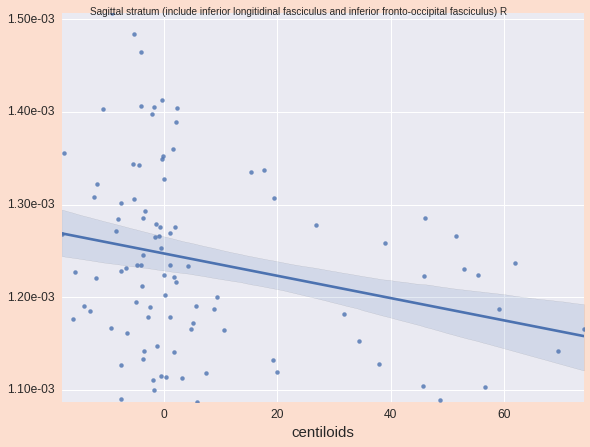

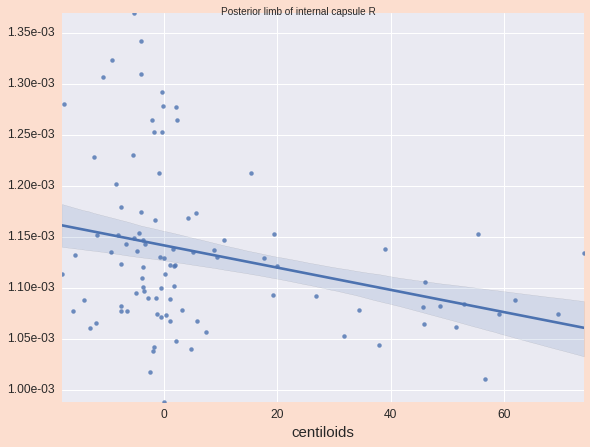

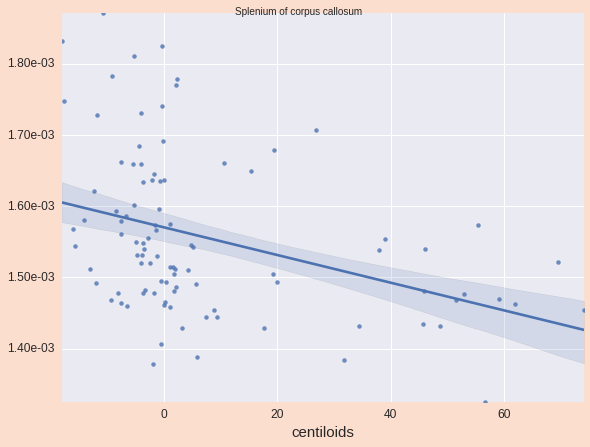

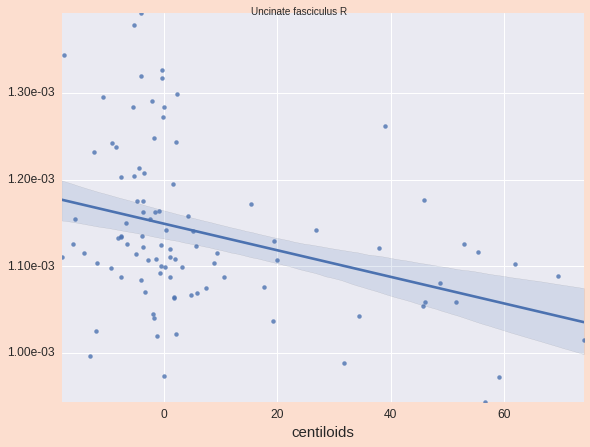

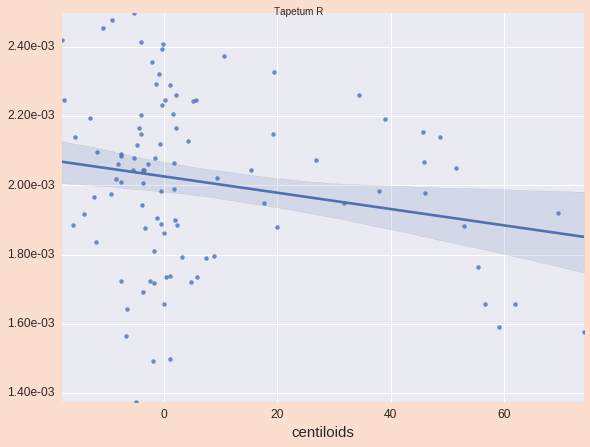

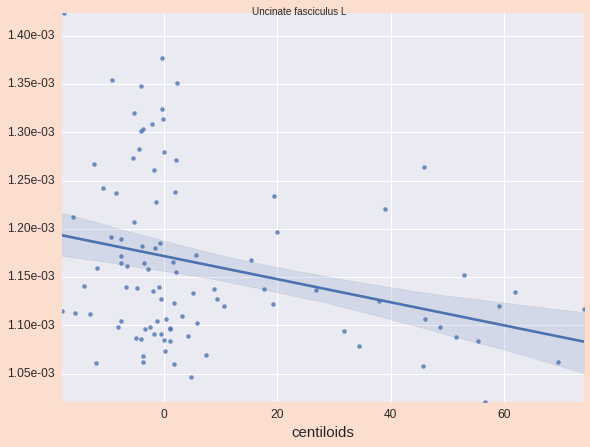

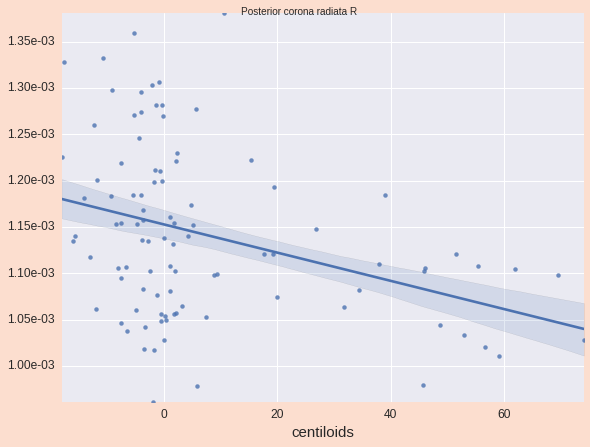

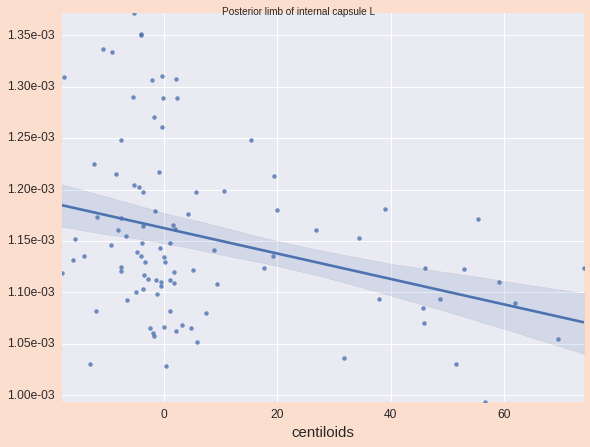

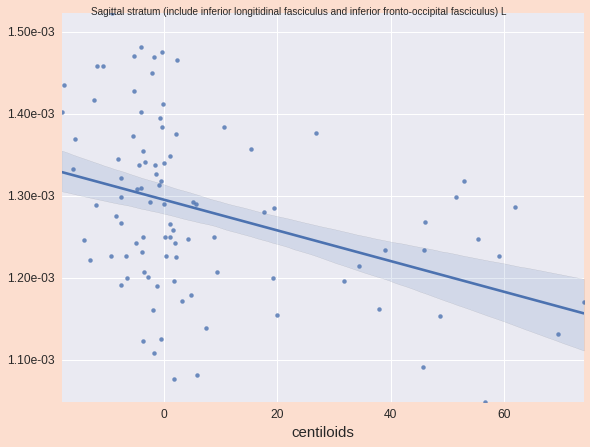

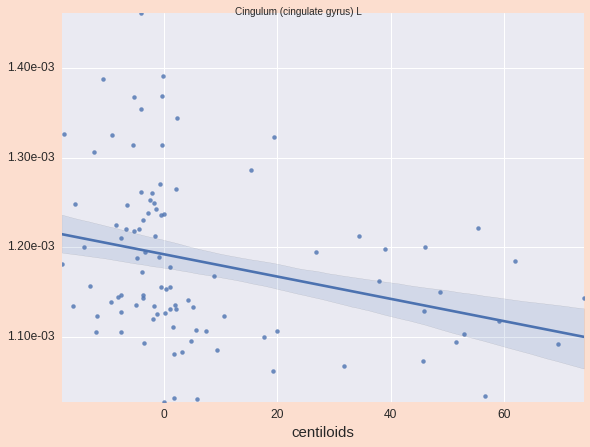

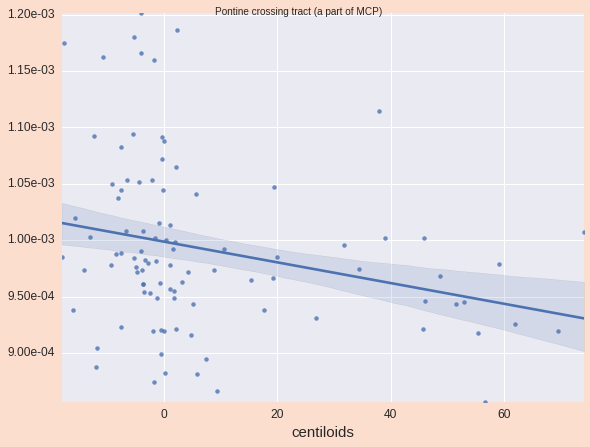

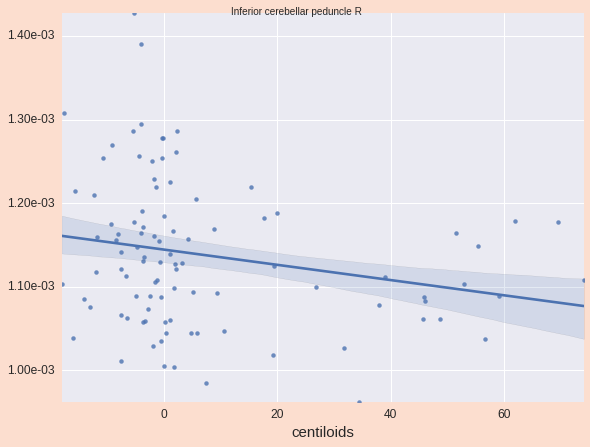

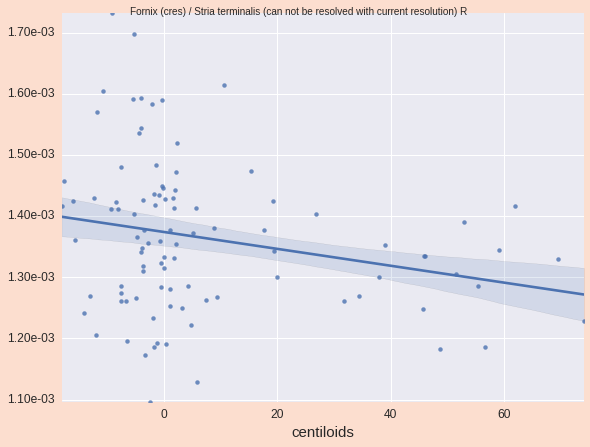

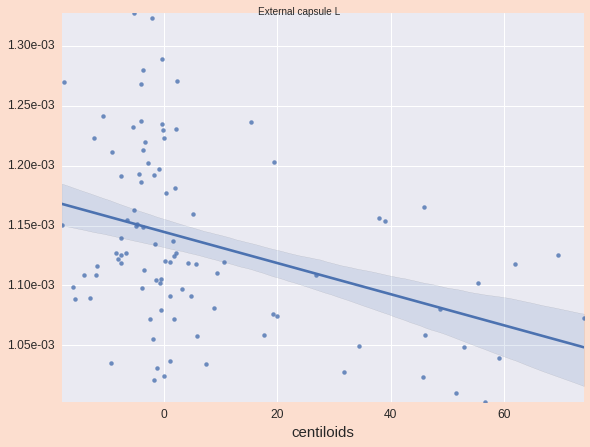

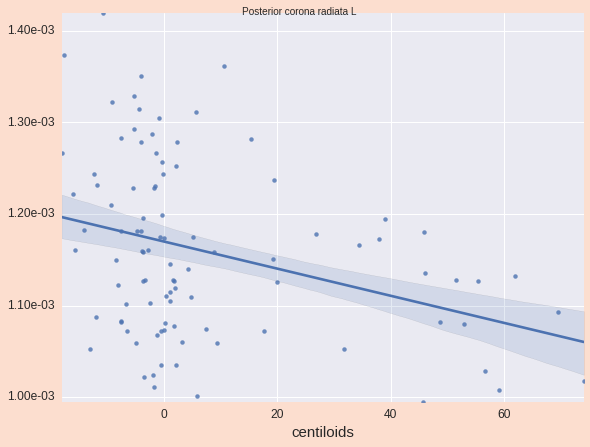

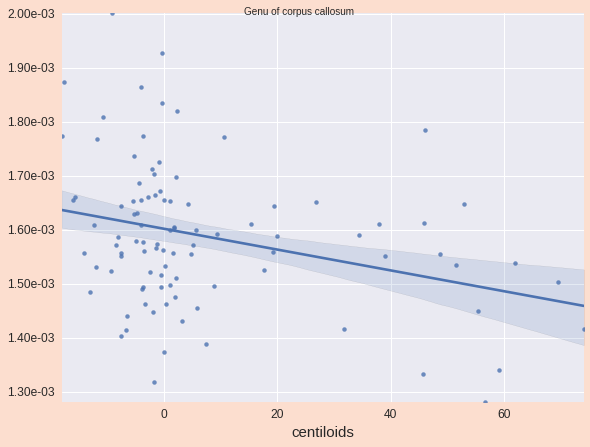

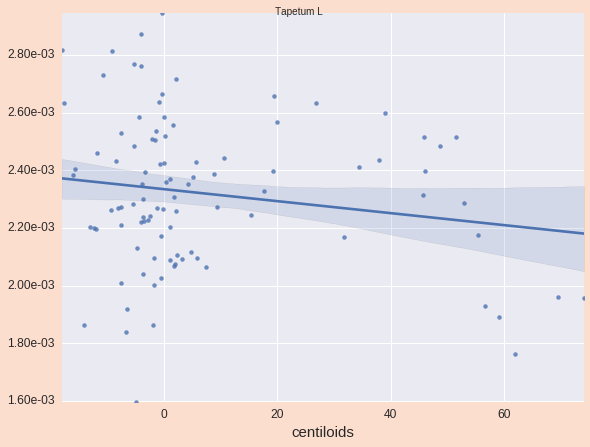

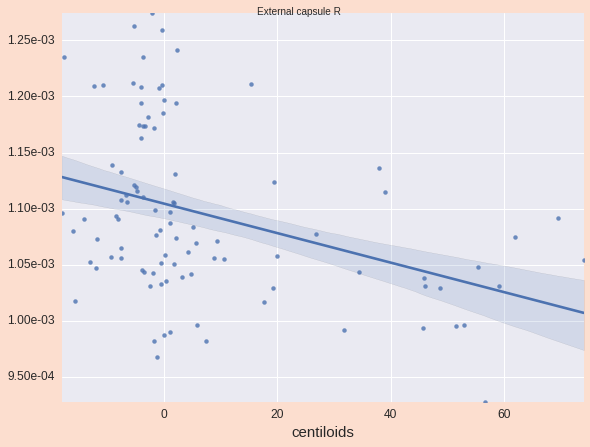

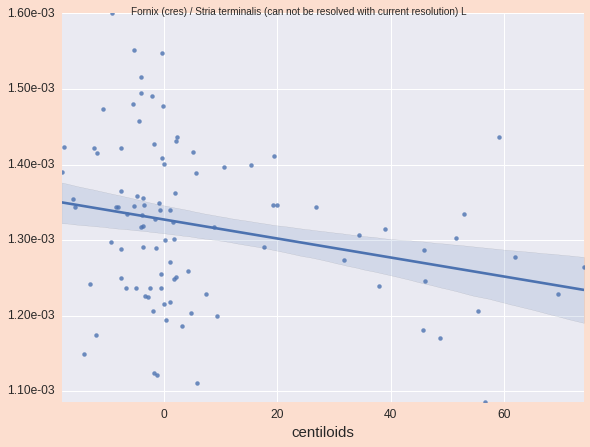

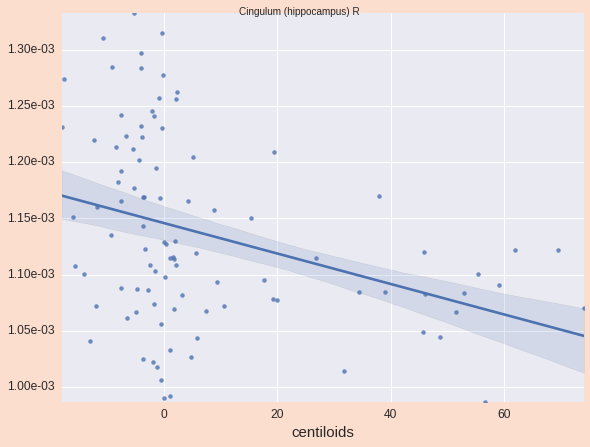

In [12]:
data = pd.read_excel('/tmp/amylstaging_ICBM-labels-1mm_TBSS_roivalues_L1.xls').set_index('subject')
cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)
data = data[data['apoe'] != 2]


for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data, hue=None, savefig='/home/grg/jpg/l1%03d.jpg'%i, facecolor=facecolor)

### Radial diffusivity

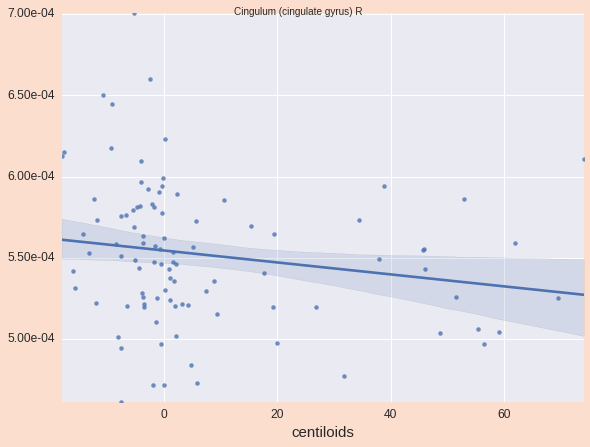

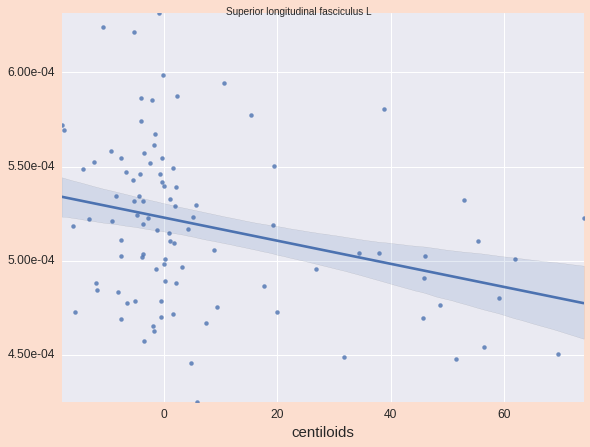

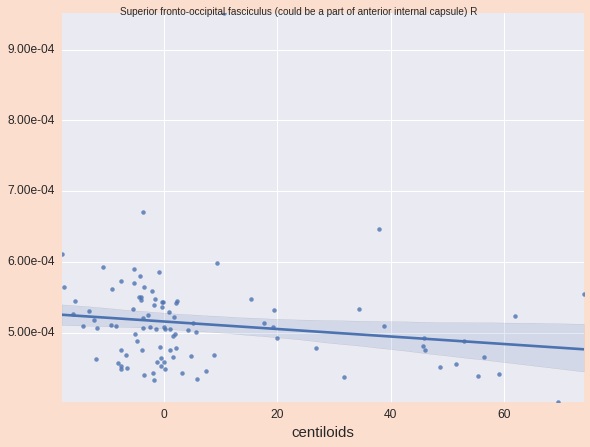

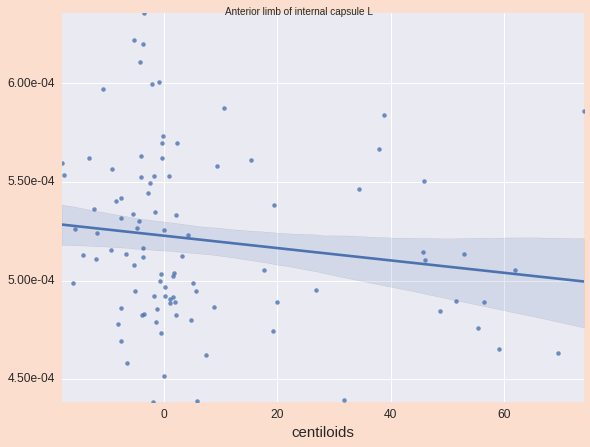

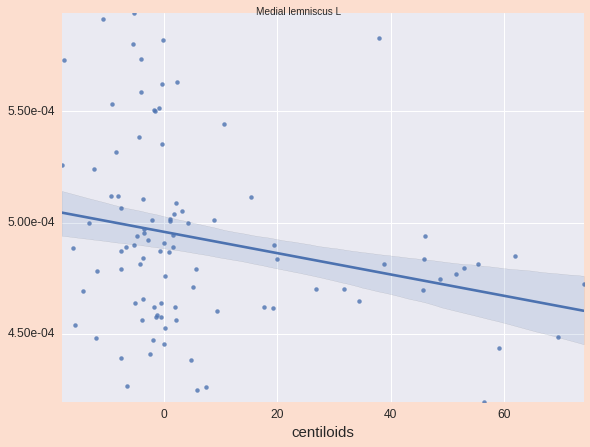

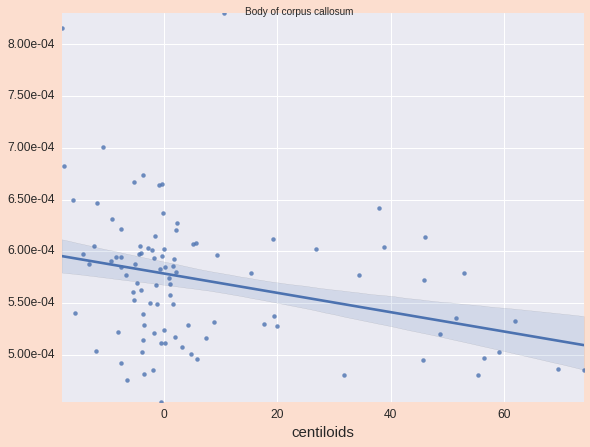

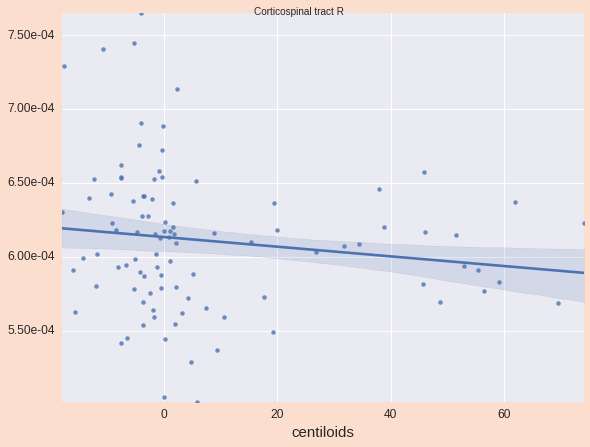

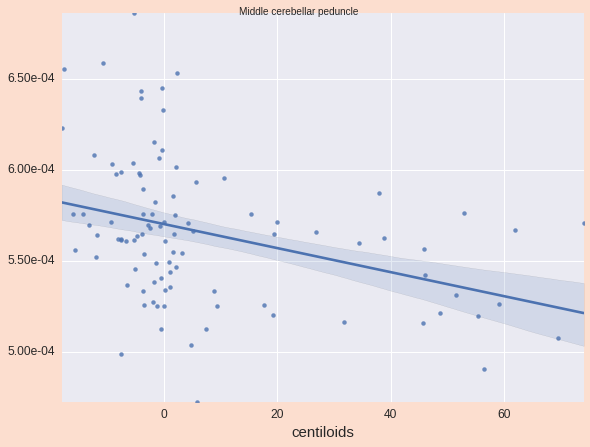

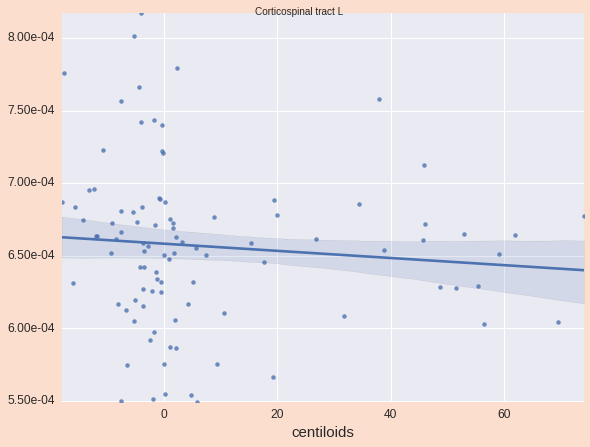

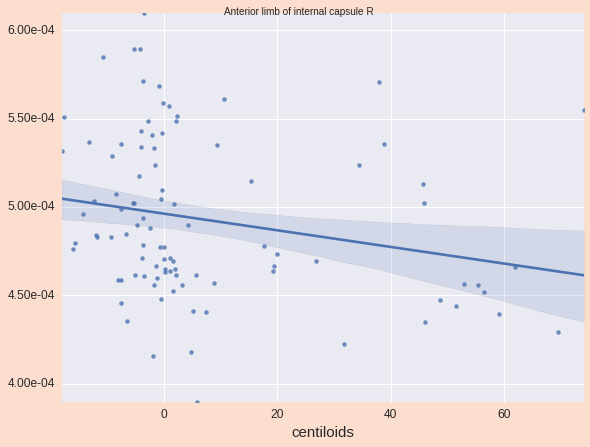

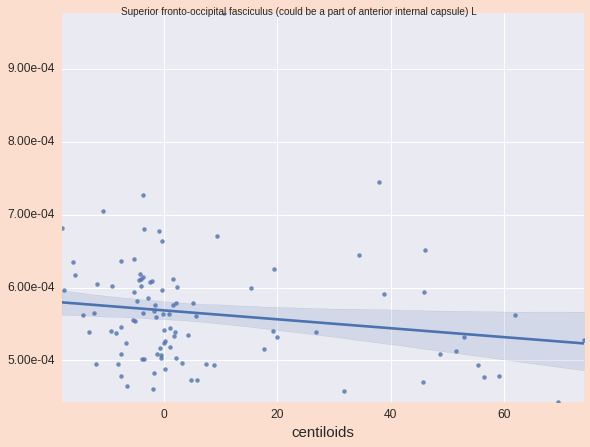

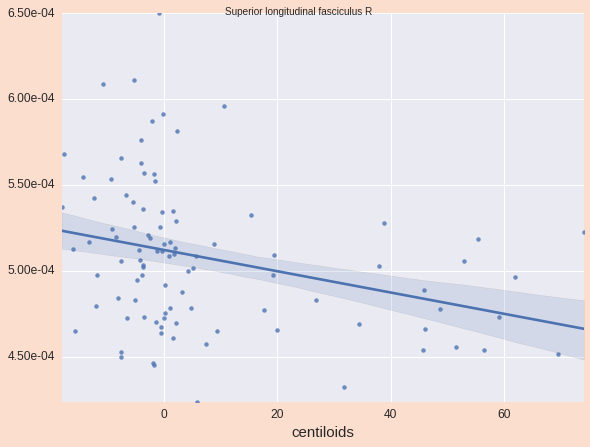

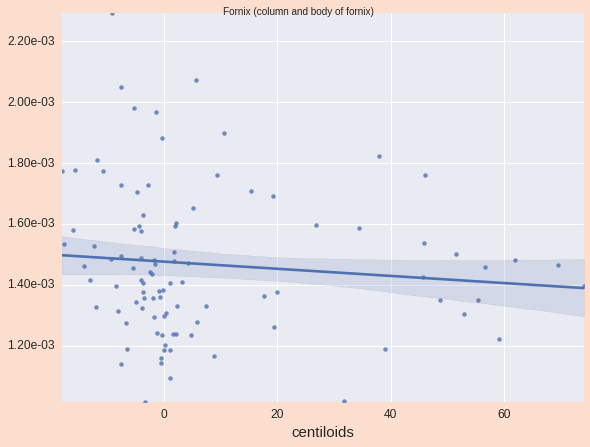

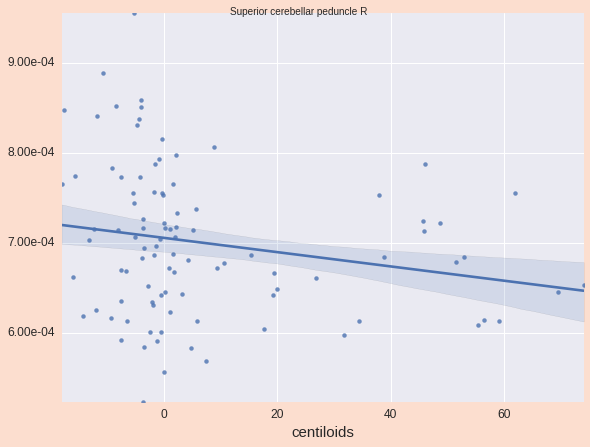

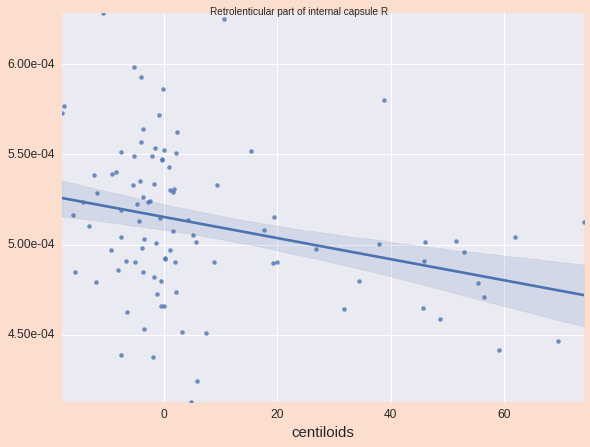

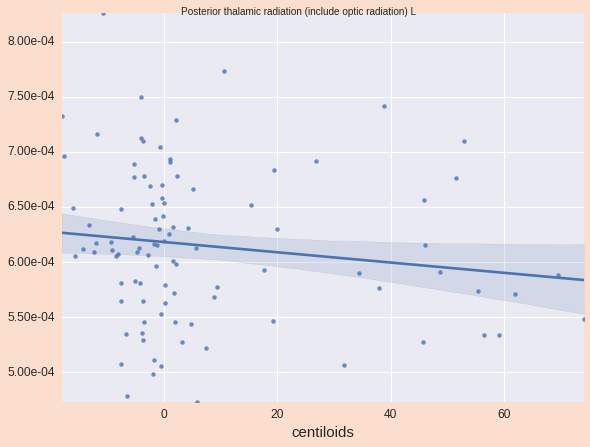

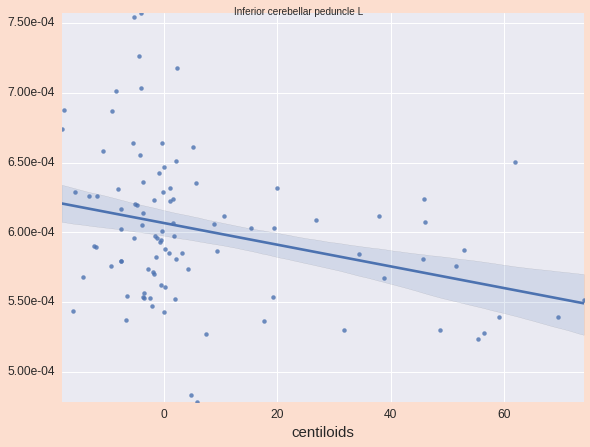

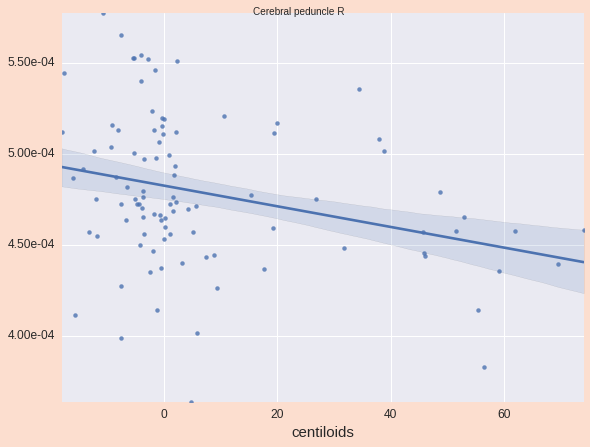

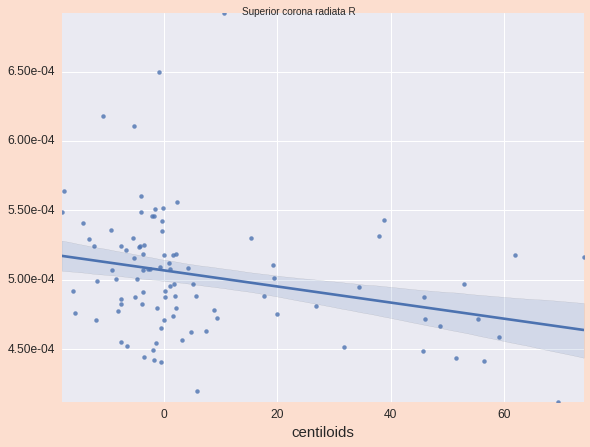

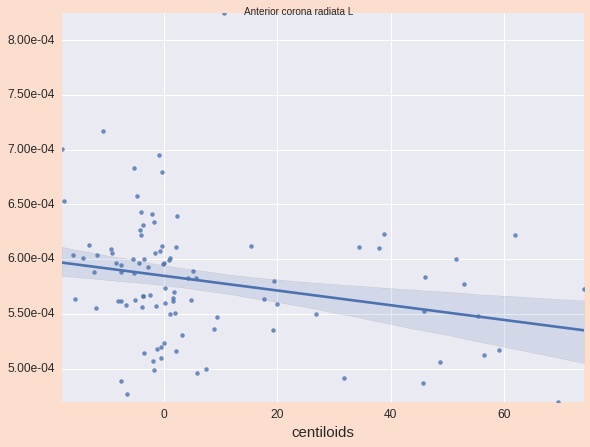

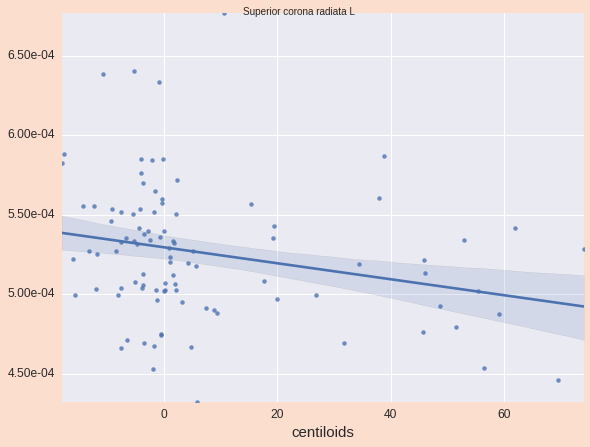

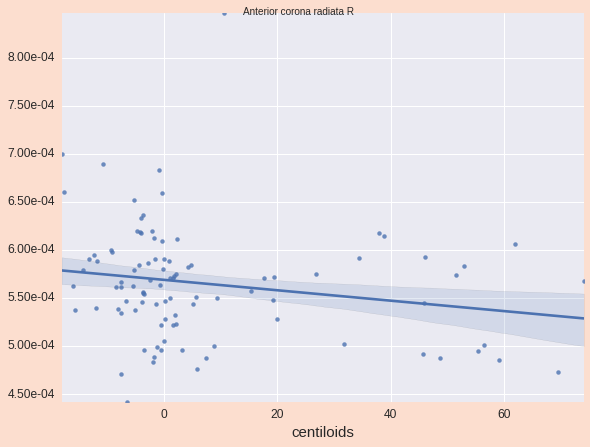

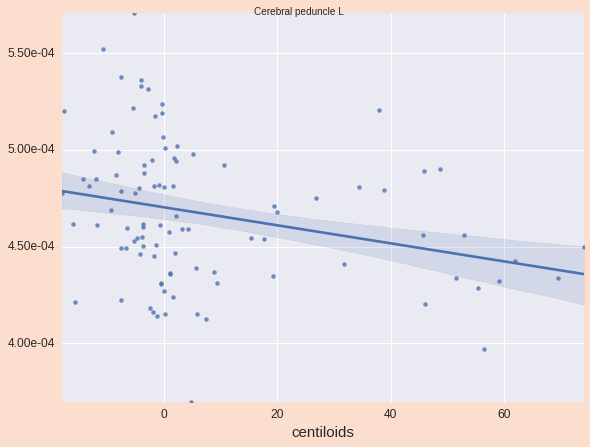

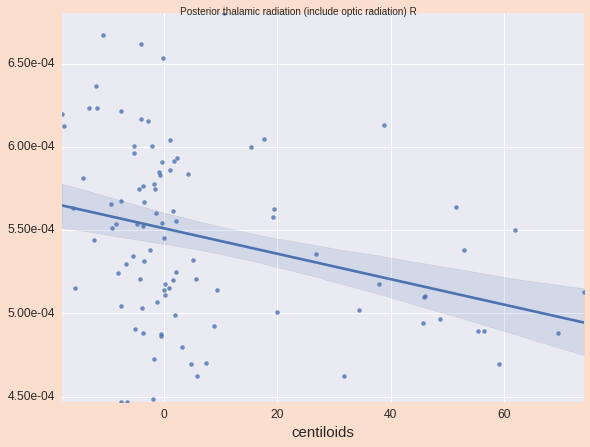

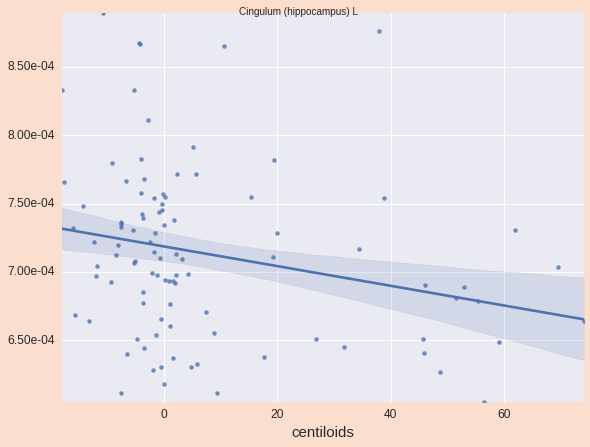

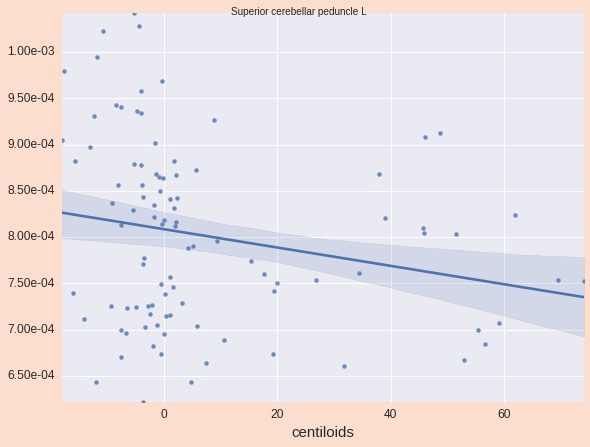

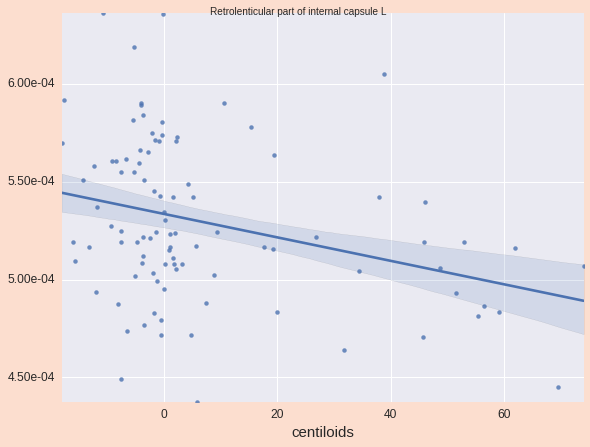

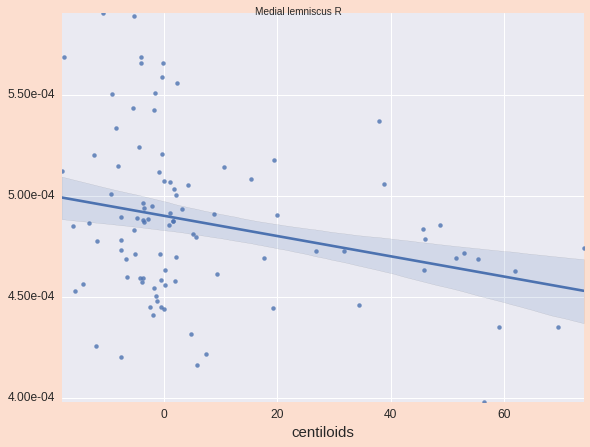

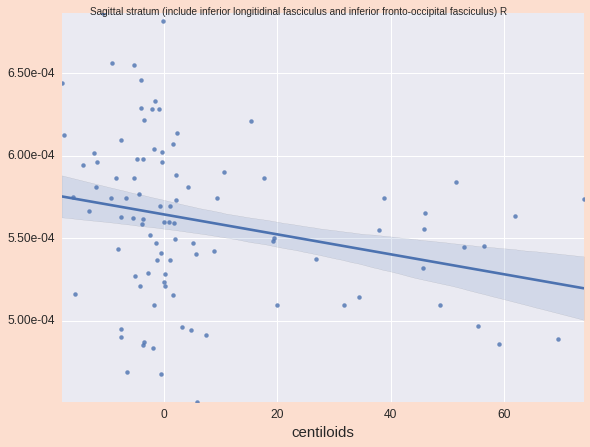

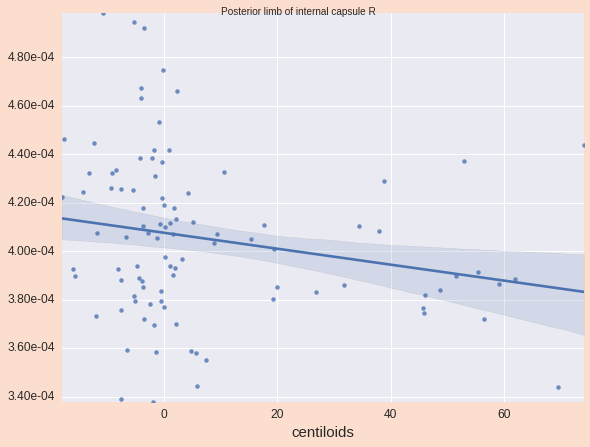

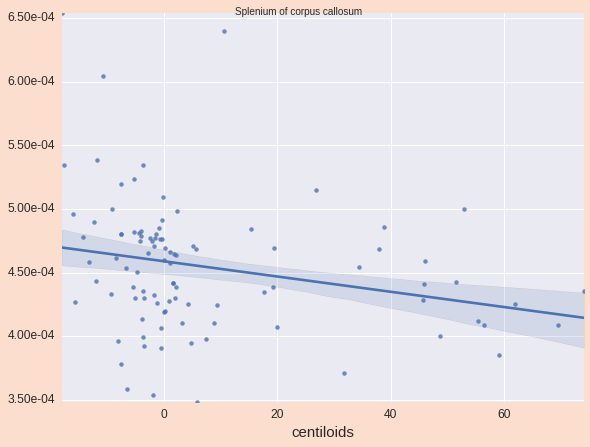

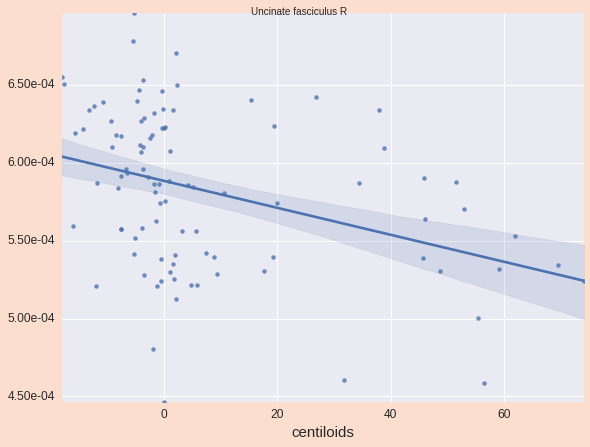

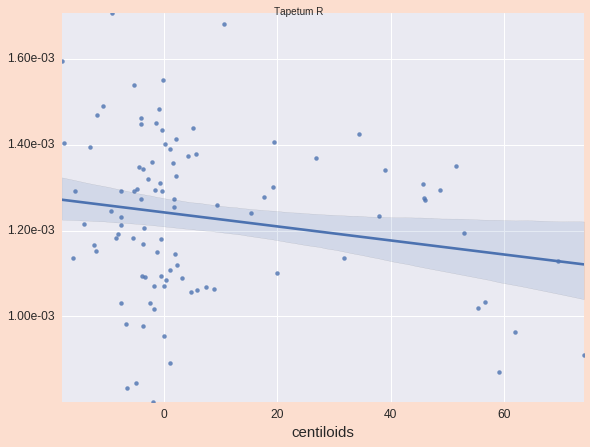

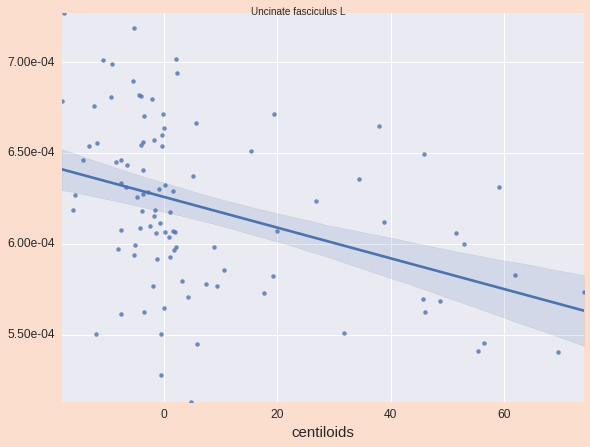

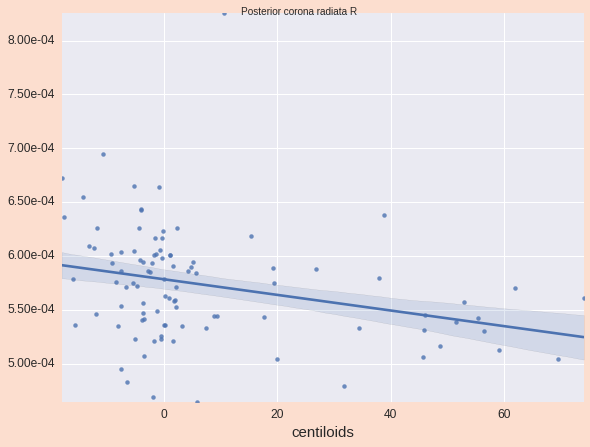

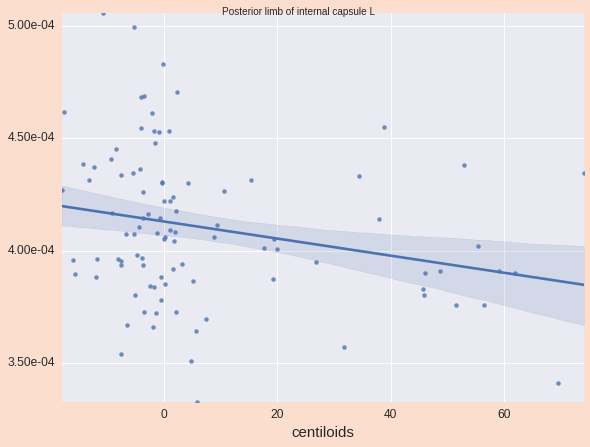

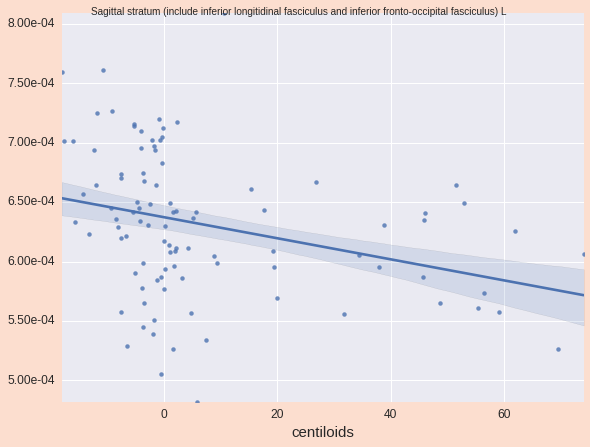

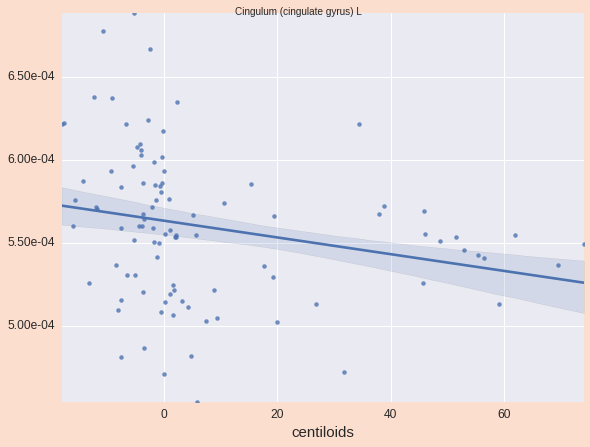

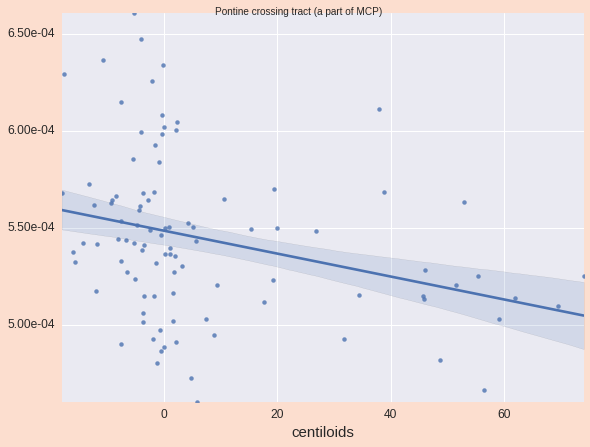

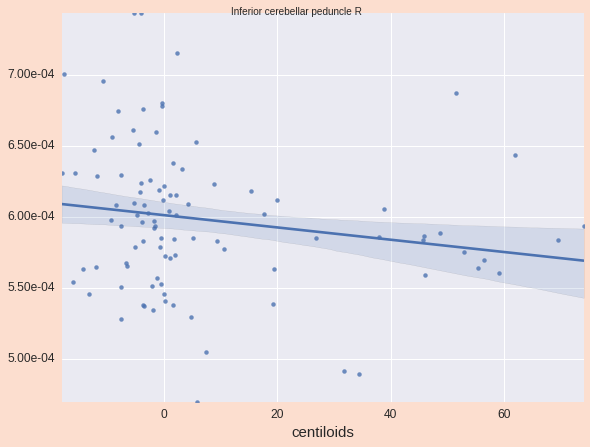

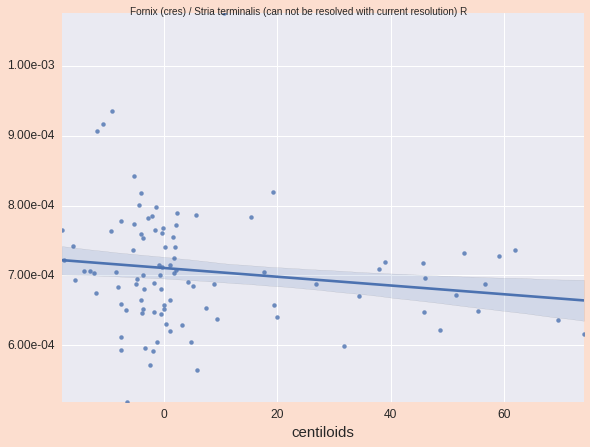

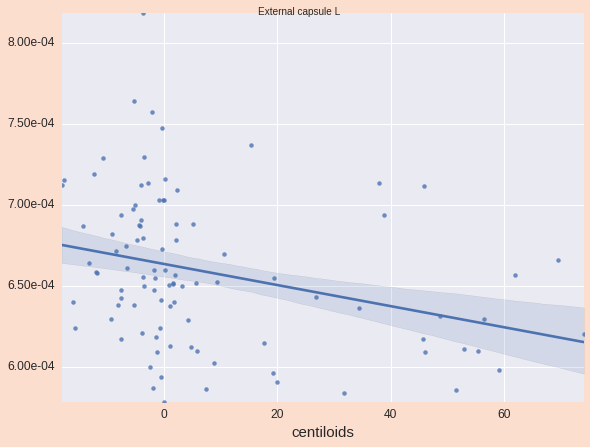

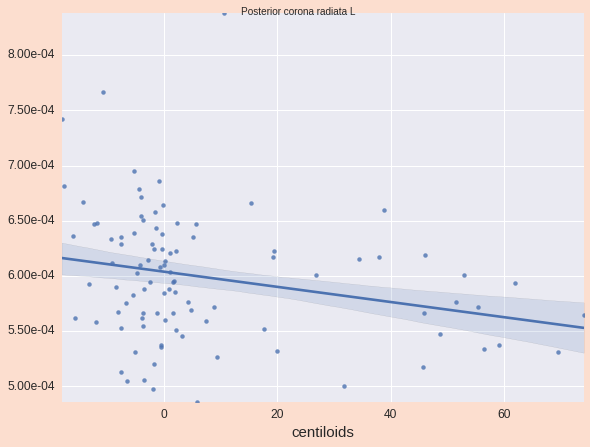

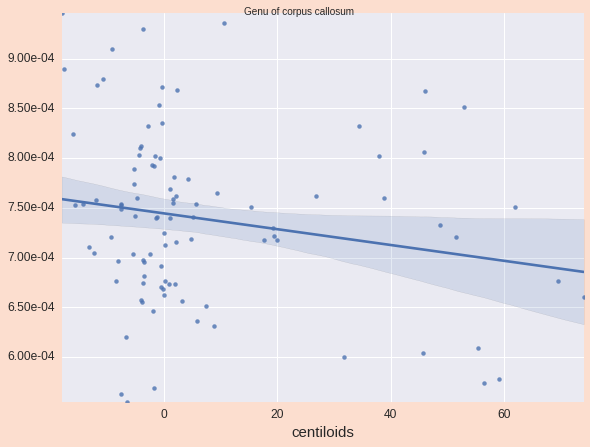

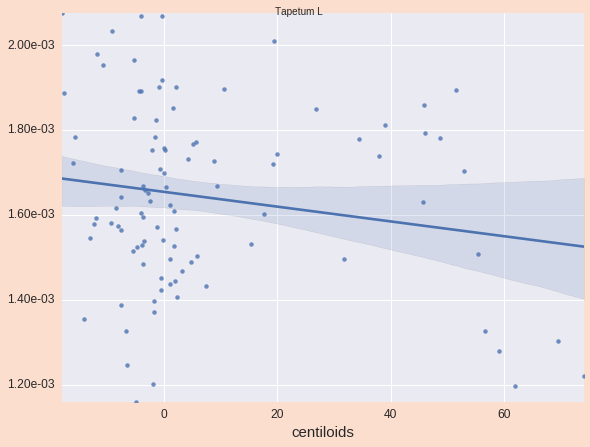

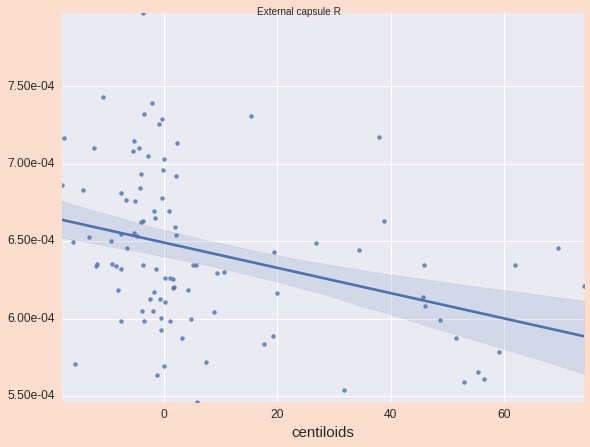

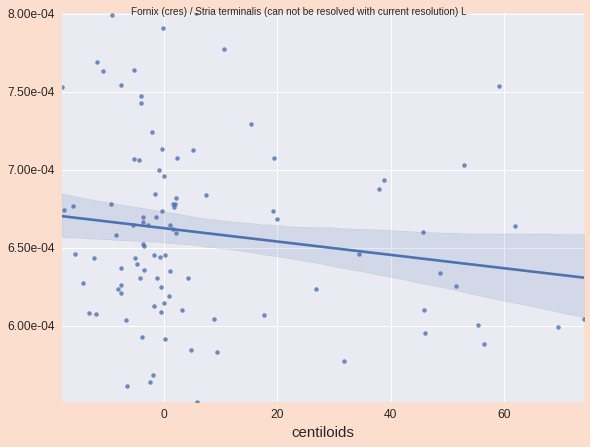

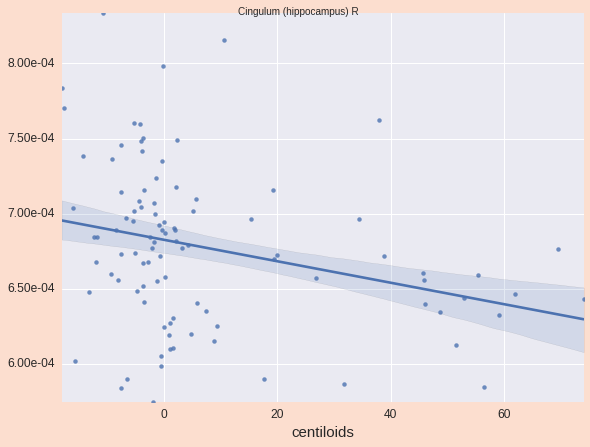

In [13]:
data = pd.read_excel('/tmp/amylstaging_ICBM-labels-1mm_TBSS_roivalues_RD.xls').set_index('subject')
cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)
data = data[data['apoe'] != 2]


for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data, hue=None, savefig='/home/grg/jpg/rd%03d.jpg'%i, facecolor=facecolor)

# Montage the graphs

In [14]:
wd = '/home/grg/jpg/'
import os
for i in xrange(48):
    cmd = 'montage %sfa%03d.jpg %smd%03d.jpg %sl1%03d.jpg %srd%03d.jpg -tile 4x -geometry +1+1 %stile%03d.jpg'%(wd,i,wd,i,wd,i,wd,i,wd,i)
    print cmd
    os.system(cmd)
cmd = 'montage %stile*.jpg -tile 1x8 -bordercolor \'%s\' -geometry +0+0  %smontage%s.jpg'%(wd, facecolor, wd, '%03d')
print cmd
os.system(cmd)
for each in glob('%smontage*.jpg'%wd):
    cmd = 'convert %s -bordercolor white -border 20 %s'%(each, each)
    print cmd
    os.system(cmd)

montage /home/grg/jpg/fa000.jpg /home/grg/jpg/md000.jpg /home/grg/jpg/l1000.jpg /home/grg/jpg/rd000.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile000.jpg
montage /home/grg/jpg/fa001.jpg /home/grg/jpg/md001.jpg /home/grg/jpg/l1001.jpg /home/grg/jpg/rd001.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile001.jpg
montage /home/grg/jpg/fa002.jpg /home/grg/jpg/md002.jpg /home/grg/jpg/l1002.jpg /home/grg/jpg/rd002.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile002.jpg
montage /home/grg/jpg/fa003.jpg /home/grg/jpg/md003.jpg /home/grg/jpg/l1003.jpg /home/grg/jpg/rd003.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile003.jpg
montage /home/grg/jpg/fa004.jpg /home/grg/jpg/md004.jpg /home/grg/jpg/l1004.jpg /home/grg/jpg/rd004.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile004.jpg
montage /home/grg/jpg/fa005.jpg /home/grg/jpg/md005.jpg /home/grg/jpg/l1005.jpg /home/grg/jpg/rd005.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile005.jpg
montage /home/grg/jpg/fa006.jpg /home/grg/jpg/md006.jpg /home/grg/jpg/l1006.